学习使用{mlr3verse}实现聚类分析。

In [2]:
library(tidyverse)
library(mlr3verse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: mlr3



In [5]:
# 查看可用的聚类算法
lrn() %>%
  as.data.table() %>%
  select(key, label) %>%
  filter(str_detect(key, "clust"))

key,label
<chr>,<chr>
clust.MBatchKMeans,Mini Batch K-Means
clust.SimpleKMeans,K-Means (Weka)
clust.agnes,Agglomerative Hierarchical Clustering
clust.ap,Affinity Propagation Clustering
clust.bico,BICO Clustering
clust.birch,BIRCH Clustering
clust.cmeans,Fuzzy C-Means Clustering Learner
clust.cobweb,Cobweb Clustering
clust.dbscan,Density-Based Clustering


In [ ]:
# 查看聚类任务
tsk() %>%
  as.data.table() %>%
  select(key, task_type) %>%
  filter(task_type == "clust")

# key       task_type
# 1 ruspini   clust    
# 2 usarrests clust

key,task_type
<chr>,<chr>
ruspini,clust
usarrests,clust


# 层次聚类

In [ ]:
tsk_ruspini <- tsk("ruspini")
tsk_ruspini

# <TaskClust:ruspini> (75 x 2): Ruspini
# * Target: -
# * Properties: -
# * Features (2):
#   - int (2): x, y

<TaskClust:ruspini> (75 x 2): Ruspini
* Target: -
* Properties: -
* Features (2):
  - int (2): x, y

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



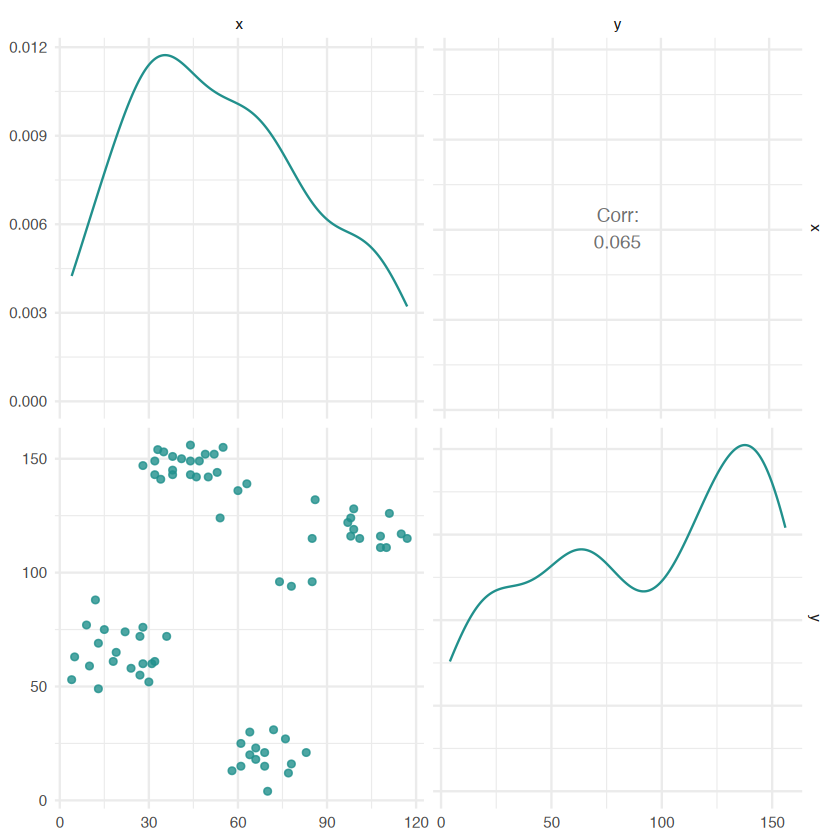

In [47]:
autoplot(tsk_ruspini)

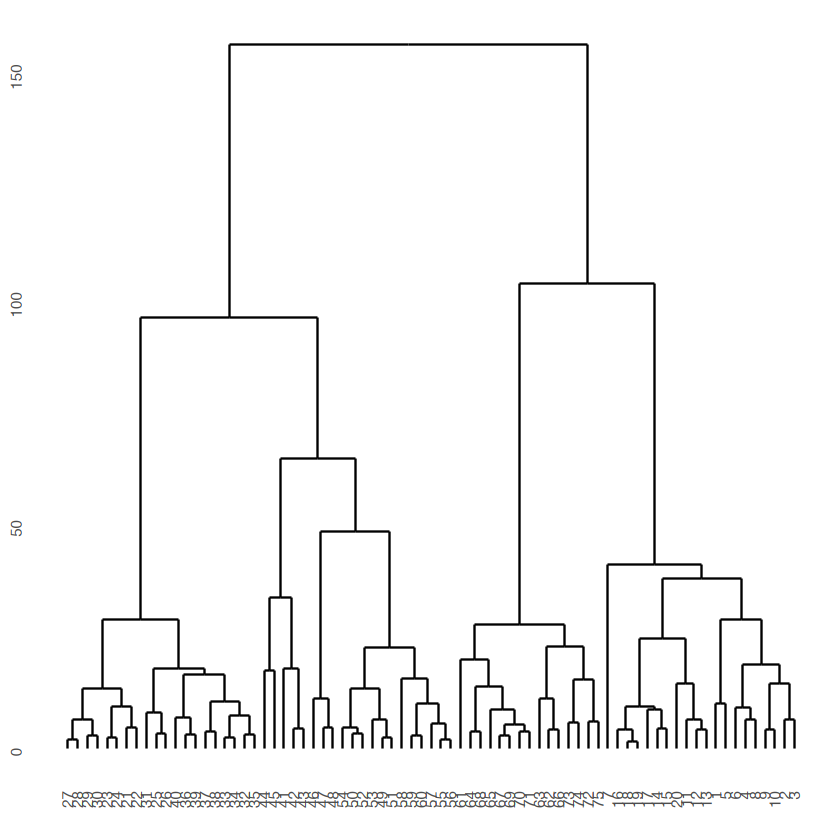

In [59]:
lrn_hclust <- lrn("clust.hclust")

lrn_hclust$train(tsk_ruspini)

# 查看聚类结果
autoplot(lrn_hclust)

In [65]:
# 定义学习器
lrn_hclust <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("clust.hclust")
)
# 训练模型
lrn_hclust$train(tsk_ruspini)

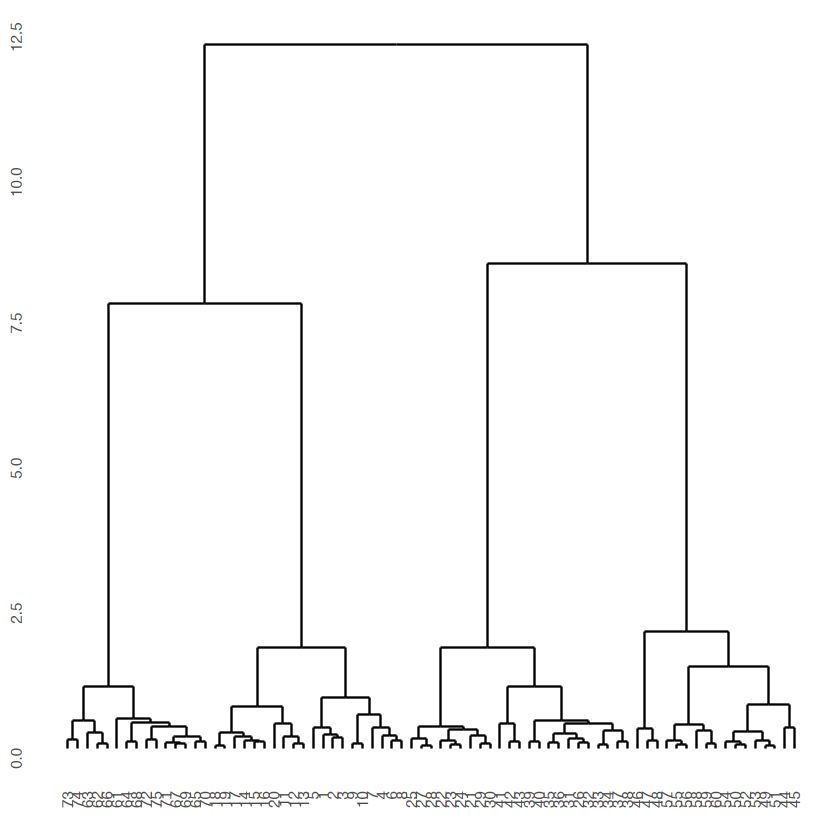

In [ ]:
# 定义学习器
lrn_hclust <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("clust.hclust")
)

# 设置聚类参数
lrn_hclust$pipeops$clust.hclust$param_set$values <- list(
  method = "ward.D2",  # 聚类方法
  k = 3                # 聚类数
)

# 训练模型
lrn_hclust$train(tsk_ruspini)

# 可视化
autoplot(lrn_hclust$base_learner())

In [72]:
as.data.table(mlr_tuning_spaces)[, .(key, label)]

key,label
<chr>,<chr>
classif.glmnet.default,Classification GLM with Default
classif.glmnet.rbv1,Classification GLM with RandomBot
classif.glmnet.rbv2,Classification GLM with RandomBot
classif.kknn.default,Classification KKNN with Default
classif.kknn.rbv1,Classification KKNN with RandomBot
classif.kknn.rbv2,Classification KKNN with RandomBot
classif.ranger.default,Classification Ranger with Default
classif.ranger.rbv1,Classification Ranger with RandomBot
classif.ranger.rbv2,Classification Ranger with RandomBot


In [125]:
# 调参
lrn_hclust <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("clust.hclust", id = "hclust")  # 设置ID非常重要，涉及到调参空间的映射
)

# 设置调参空间
search_space <- ps(
  hclust.method = p_fct(
    c("ward.D2", "single", "complete", "average")
  ),  # 需要添加步骤ID前缀
  hclust.k = p_int(
    lower = 2L, upper = 10L
  ),  # 原始参数名 clust.hclust.k 会自动映射为 hclust.k
  hclust.distmethod = p_fct(
    c("euclidean", "manhattan", "maximum", "canberra", "binary", "minkowski")
  )
)

# 设置度量指标
msr <- msr("clust.silhouette")

# 设置调优器
tnr_grid <- tnr("grid_search", resolution = 10L)

# 开始调参
instance <- tune(
  tuner = tnr_grid,
  task = tsk_ruspini,
  learner = lrn_hclust,
  resampling = rsmp("insample"),
  measures = msr,
  search_space = search_space
)

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustSil has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustSil.



INFO  [20:25:15.954] [bbotk] Starting to optimize 3 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [20:25:15.964] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:15.969] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:15.974] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.028] [mlr3] Finished benchmark
INFO  [20:25:16.056] [bbotk] Result of batch 1:
INFO  [20:25:16.061] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.061] [bbotk]        ward.D2        8           maximum        0.4742018        0      0
INFO  [20:25:16.061] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.061] [bbotk]             0.043 120c689d-2007-4c39-a562-5e119be692e9
INFO  [20:25:16.065] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.070] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.073] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.165] [mlr3] Finished benchmark
INFO  [20:25:16.189] [bbotk] Result of batch 2:
INFO  [20:25:16.195] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.195] [bbotk]         single        6         euclidean        0.6594717        0      0
INFO  [20:25:16.195] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.195] [bbotk]             0.084 b010d138-7b91-4569-aafb-6d3063ad2f81
INFO  [20:25:16.203] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.367] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.382] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.435] [mlr3] Finished benchmark
INFO  [20:25:16.451] [bbotk] Result of batch 3:
INFO  [20:25:16.454] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.454] [bbotk]        average       10         minkowski        0.3847952        0      0
INFO  [20:25:16.454] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.454] [bbotk]             0.041 2d96c0be-ddfb-42ad-bbde-3d90bfcd8dc2
INFO  [20:25:16.460] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.464] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.466] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.501] [mlr3] Finished benchmark
INFO  [20:25:16.516] [bbotk] Result of batch 4:
INFO  [20:25:16.517] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.517] [bbotk]         single        2         manhattan        0.3163174        0      0
INFO  [20:25:16.517] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.517] [bbotk]              0.03 0b75ef84-45fa-4309-9261-51a3c72ef4c6
INFO  [20:25:16.518] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.521] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.523] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.562] [mlr3] Finished benchmark
INFO  [20:25:16.577] [bbotk] Result of batch 5:
INFO  [20:25:16.578] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.578] [bbotk]         single       10         euclidean        0.4034004        0      0
INFO  [20:25:16.578] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.578] [bbotk]             0.033 6235a454-b198-411b-bd9c-6a62438fde9c
INFO  [20:25:16.580] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.582] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.585] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.628] [mlr3] Finished benchmark
INFO  [20:25:16.651] [bbotk] Result of batch 6:
INFO  [20:25:16.653] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.653] [bbotk]        ward.D2        4         minkowski         0.737657        0      0
INFO  [20:25:16.653] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.653] [bbotk]             0.029 8e9c32d7-d3a3-469f-8263-a2727b4daca0
INFO  [20:25:16.656] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.661] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.664] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.697] [mlr3] Finished benchmark
INFO  [20:25:16.713] [bbotk] Result of batch 7:
INFO  [20:25:16.714] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.714] [bbotk]         single        7         minkowski        0.6287804        0      0
INFO  [20:25:16.714] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.714] [bbotk]             0.029 38f63f75-bcb2-4ee5-9c00-f1652db7ecdf
INFO  [20:25:16.715] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.718] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.720] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.757] [mlr3] Finished benchmark
INFO  [20:25:16.771] [bbotk] Result of batch 8:
INFO  [20:25:16.772] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.772] [bbotk]        ward.D2        2         minkowski        0.5827264        0      0
INFO  [20:25:16.772] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.772] [bbotk]             0.031 223ee072-fee5-436a-98d0-2739ab404e3d
INFO  [20:25:16.774] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.777] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.779] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.818] [mlr3] Finished benchmark
INFO  [20:25:16.834] [bbotk] Result of batch 9:
INFO  [20:25:16.836] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.836] [bbotk]        ward.D2        7          canberra        0.5693845        0      0
INFO  [20:25:16.836] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.836] [bbotk]             0.034 0b568c2d-fb48-47b5-b90f-678782b2095b
INFO  [20:25:16.837] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.840] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.844] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.901] [mlr3] Finished benchmark
INFO  [20:25:16.917] [bbotk] Result of batch 10:
INFO  [20:25:16.918] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.918] [bbotk]       complete        5         manhattan        0.7134788        0      0
INFO  [20:25:16.918] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.918] [bbotk]             0.051 31bdb219-737e-4418-82ff-878f08ef74ed
INFO  [20:25:16.920] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.923] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.926] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:16.963] [mlr3] Finished benchmark
INFO  [20:25:16.977] [bbotk] Result of batch 11:
INFO  [20:25:16.978] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:16.978] [bbotk]       complete       10           maximum        0.3868628        0      0
INFO  [20:25:16.978] [bbotk]  runtime_learners                                uhash
INFO  [20:25:16.978] [bbotk]             0.032 9d4c198f-40fa-49a4-9ba7-d8679e8632be
INFO  [20:25:16.980] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:16.983] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:16.985] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.019] [mlr3] Finished benchmark
INFO  [20:25:17.034] [bbotk] Result of batch 12:
INFO  [20:25:17.035] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.035] [bbotk]        ward.D2        8         manhattan        0.4719981        0      0
INFO  [20:25:17.035] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.035] [bbotk]             0.029 5ed8dba9-1ad8-42fd-9627-8b6c310a6434
INFO  [20:25:17.036] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.039] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.042] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.084] [mlr3] Finished benchmark
INFO  [20:25:17.106] [bbotk] Result of batch 13:
INFO  [20:25:17.108] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.108] [bbotk]        average        5         minkowski        0.6871715        0      0
INFO  [20:25:17.108] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.108] [bbotk]             0.036 e575d3ad-062e-4c79-9ad2-90e8a827b73d
INFO  [20:25:17.110] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.115] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.118] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.152] [mlr3] Finished benchmark
INFO  [20:25:17.166] [bbotk] Result of batch 14:
INFO  [20:25:17.167] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.167] [bbotk]        average       10         euclidean        0.3847952        0      0
INFO  [20:25:17.167] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.167] [bbotk]             0.028 9e209cf6-d3c9-4f21-83ea-8bd575839d28
INFO  [20:25:17.169] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.172] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.174] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.209] [mlr3] Finished benchmark
INFO  [20:25:17.222] [bbotk] Result of batch 15:
INFO  [20:25:17.223] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.223] [bbotk]        ward.D2        7         manhattan         0.496887        0      0
INFO  [20:25:17.223] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.223] [bbotk]              0.03 91573652-f49a-477b-bcae-736cec83069a
INFO  [20:25:17.224] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.228] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.230] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.263] [mlr3] Finished benchmark
INFO  [20:25:17.277] [bbotk] Result of batch 16:
INFO  [20:25:17.278] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.278] [bbotk]       complete       10         manhattan         0.364794        0      0
INFO  [20:25:17.278] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.278] [bbotk]             0.027 83d07553-857b-4d3e-a69e-adfde6a58981
INFO  [20:25:17.279] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.289] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.292] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.338] [mlr3] Finished benchmark
INFO  [20:25:17.351] [bbotk] Result of batch 17:
INFO  [20:25:17.353] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.353] [bbotk]        average        3         euclidean        0.6327047        0      0
INFO  [20:25:17.353] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.353] [bbotk]             0.038 4de28200-5b5b-47c8-8266-3e73d7ab8c04
INFO  [20:25:17.354] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.357] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.359] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.393] [mlr3] Finished benchmark
INFO  [20:25:17.405] [bbotk] Result of batch 18:
INFO  [20:25:17.407] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.407] [bbotk]         single        8           maximum        0.5641882        0      0
INFO  [20:25:17.407] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.407] [bbotk]             0.028 d5586f23-8e77-4f46-93c2-b1d4b058ddfa
INFO  [20:25:17.408] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.411] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.413] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.447] [mlr3] Finished benchmark
INFO  [20:25:17.461] [bbotk] Result of batch 19:
INFO  [20:25:17.462] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.462] [bbotk]        average        3           maximum        0.6327047        0      0
INFO  [20:25:17.462] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.462] [bbotk]             0.028 ada4afa1-62d9-4f8f-aa00-4b8eeea53047
INFO  [20:25:17.464] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.466] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.469] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.515] [mlr3] Finished benchmark
INFO  [20:25:17.538] [bbotk] Result of batch 20:
INFO  [20:25:17.540] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.540] [bbotk]         single        4          canberra         0.177512        0      0
INFO  [20:25:17.540] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.540] [bbotk]             0.039 fc19088a-bd20-4ee5-b12c-78aeb5c30d50
INFO  [20:25:17.541] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.544] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.547] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.581] [mlr3] Finished benchmark
INFO  [20:25:17.595] [bbotk] Result of batch 21:
INFO  [20:25:17.597] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.597] [bbotk]       complete        4         manhattan         0.737657        0      0
INFO  [20:25:17.597] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.597] [bbotk]              0.03 04776a1f-89b7-48b3-bfeb-6341f6230404
INFO  [20:25:17.598] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.601] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.603] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.702] [mlr3] Finished benchmark
INFO  [20:25:17.787] [bbotk] Result of batch 22:
INFO  [20:25:17.792] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.792] [bbotk]        average        2         euclidean        0.5827264        0      0
INFO  [20:25:17.792] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.792] [bbotk]             0.077 fb23ee9e-7f63-4c6a-be35-192b99050dd0
INFO  [20:25:17.794] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.800] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.804] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.852] [mlr3] Finished benchmark
INFO  [20:25:17.886] [bbotk] Result of batch 23:
INFO  [20:25:17.889] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.889] [bbotk]       complete        3            binary     -0.007748318        0      0
INFO  [20:25:17.889] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.889] [bbotk]              0.04 33834889-db04-4ae5-9b84-fe82e90fa605
INFO  [20:25:17.894] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.900] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.904] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:17.959] [mlr3] Finished benchmark
INFO  [20:25:17.976] [bbotk] Result of batch 24:
INFO  [20:25:17.977] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:17.977] [bbotk]       complete        3         manhattan        0.6413923        0      0
INFO  [20:25:17.977] [bbotk]  runtime_learners                                uhash
INFO  [20:25:17.977] [bbotk]             0.044 9dc717de-7c25-446e-94dd-0107d2cfd1de
INFO  [20:25:17.978] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:17.982] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:17.985] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.024] [mlr3] Finished benchmark
INFO  [20:25:18.041] [bbotk] Result of batch 25:
INFO  [20:25:18.042] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.042] [bbotk]        ward.D2        3         euclidean        0.6327047        0      0
INFO  [20:25:18.042] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.042] [bbotk]             0.033 ae7deaaf-ea8c-453b-aea7-d734c286e612
INFO  [20:25:18.044] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.047] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.049] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.085] [mlr3] Finished benchmark
INFO  [20:25:18.100] [bbotk] Result of batch 26:
INFO  [20:25:18.102] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.102] [bbotk]        average        3            binary     -0.007748318        0      0
INFO  [20:25:18.102] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.102] [bbotk]             0.031 00e74f8f-5573-4237-903e-c346e51c80d9
INFO  [20:25:18.105] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.108] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.111] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.177] [mlr3] Finished benchmark
INFO  [20:25:18.191] [bbotk] Result of batch 27:
INFO  [20:25:18.193] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.193] [bbotk]        average       10         manhattan        0.4240108        0      0
INFO  [20:25:18.193] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.193] [bbotk]             0.059 2de204b1-ca67-4a7b-9043-f51f87a6d4c0
INFO  [20:25:18.195] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.198] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.201] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.236] [mlr3] Finished benchmark
INFO  [20:25:18.250] [bbotk] Result of batch 28:
INFO  [20:25:18.252] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.252] [bbotk]        ward.D2        6         euclidean        0.6056605        0      0
INFO  [20:25:18.252] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.252] [bbotk]             0.031 a8a3a159-9213-4089-9a58-f043caf6285f
INFO  [20:25:18.253] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.256] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.258] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.293] [mlr3] Finished benchmark
INFO  [20:25:18.307] [bbotk] Result of batch 29:
INFO  [20:25:18.308] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.308] [bbotk]       complete        2            binary      -0.01174541        0      0
INFO  [20:25:18.308] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.308] [bbotk]              0.03 e18a39c0-a209-4896-823d-0c512567eb23
INFO  [20:25:18.310] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.312] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.315] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.361] [mlr3] Finished benchmark
INFO  [20:25:18.384] [bbotk] Result of batch 30:
INFO  [20:25:18.385] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.385] [bbotk]       complete        2         manhattan        0.5827264        0      0
INFO  [20:25:18.385] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.385] [bbotk]              0.04 971801a7-4535-47f9-968a-00ee01fc49dc
INFO  [20:25:18.387] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.390] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.392] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.426] [mlr3] Finished benchmark
INFO  [20:25:18.442] [bbotk] Result of batch 31:
INFO  [20:25:18.443] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.443] [bbotk]         single        2          canberra      -0.08662743        0      0
INFO  [20:25:18.443] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.443] [bbotk]             0.029 d5643001-b73a-48b8-8500-134cb035ee64
INFO  [20:25:18.444] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.447] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.450] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.483] [mlr3] Finished benchmark
INFO  [20:25:18.498] [bbotk] Result of batch 32:
INFO  [20:25:18.500] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.500] [bbotk]        average        4            binary      0.004260432        0      0
INFO  [20:25:18.500] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.500] [bbotk]             0.029 d9effc8e-b61a-4ed2-bbbd-a5537cab99ee
INFO  [20:25:18.501] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.504] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.506] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.544] [mlr3] Finished benchmark
INFO  [20:25:18.569] [bbotk] Result of batch 33:
INFO  [20:25:18.571] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.571] [bbotk]        ward.D2        2         euclidean        0.5827264        0      0
INFO  [20:25:18.571] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.571] [bbotk]             0.033 e161c28f-52d5-4c85-b3fe-795b2cdb447c
INFO  [20:25:18.573] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.578] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.582] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.622] [mlr3] Finished benchmark
INFO  [20:25:18.636] [bbotk] Result of batch 34:
INFO  [20:25:18.637] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.637] [bbotk]       complete        3         euclidean        0.4516184        0      0
INFO  [20:25:18.637] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.637] [bbotk]             0.033 6b0ba3e4-5432-4ea5-95bb-6131ffcb098b
INFO  [20:25:18.638] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.642] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.644] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.678] [mlr3] Finished benchmark
INFO  [20:25:18.691] [bbotk] Result of batch 35:
INFO  [20:25:18.693] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.693] [bbotk]        average        4         euclidean         0.737657        0      0
INFO  [20:25:18.693] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.693] [bbotk]             0.029 919fda08-9537-42ca-9389-34f9f9e30c5d
INFO  [20:25:18.695] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.698] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.700] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.735] [mlr3] Finished benchmark
INFO  [20:25:18.750] [bbotk] Result of batch 36:
INFO  [20:25:18.751] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:18.751] [bbotk]        ward.D2        6         minkowski        0.6056605        0      0
INFO  [20:25:18.751] [bbotk]  runtime_learners                                uhash
INFO  [20:25:18.751] [bbotk]             0.028 bd44af05-8870-4247-98ae-09a817c1e734
INFO  [20:25:18.753] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:18.756] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:18.758] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:18.998] [mlr3] Finished benchmark
INFO  [20:25:19.013] [bbotk] Result of batch 37:
INFO  [20:25:19.015] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.015] [bbotk]        average        5            binary       0.01545141        0      0
INFO  [20:25:19.015] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.015] [bbotk]             0.049 25d07a7c-3cfc-4649-ae2c-6e33cbdbe11a
INFO  [20:25:19.016] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.019] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.022] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.058] [mlr3] Finished benchmark
INFO  [20:25:19.072] [bbotk] Result of batch 38:
INFO  [20:25:19.074] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.074] [bbotk]       complete       10         minkowski        0.3808333        0      0
INFO  [20:25:19.074] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.074] [bbotk]             0.031 3d711249-bb83-4d4a-a223-f7afbdf501a5
INFO  [20:25:19.075] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.078] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.080] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.114] [mlr3] Finished benchmark
INFO  [20:25:19.128] [bbotk] Result of batch 39:
INFO  [20:25:19.130] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.130] [bbotk]        average        6           maximum        0.6184782        0      0
INFO  [20:25:19.130] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.130] [bbotk]             0.028 580d9846-5dc5-44c5-beba-cc1ea4c0d312
INFO  [20:25:19.131] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.134] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.136] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.181] [mlr3] Finished benchmark
INFO  [20:25:19.204] [bbotk] Result of batch 40:
INFO  [20:25:19.206] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.206] [bbotk]         single       10         minkowski        0.4034004        0      0
INFO  [20:25:19.206] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.206] [bbotk]             0.038 8a31d64b-769e-40d9-832f-816ef0632c9b
INFO  [20:25:19.209] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.214] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.216] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.250] [mlr3] Finished benchmark
INFO  [20:25:19.265] [bbotk] Result of batch 41:
INFO  [20:25:19.266] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.266] [bbotk]       complete        4            binary      0.004260432        0      0
INFO  [20:25:19.266] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.266] [bbotk]              0.03 bb8a4389-dc1f-4ec0-b586-ae397f68e5c3
INFO  [20:25:19.268] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.271] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.273] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.307] [mlr3] Finished benchmark
INFO  [20:25:19.320] [bbotk] Result of batch 42:
INFO  [20:25:19.321] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.321] [bbotk]       complete        5         euclidean        0.6445062        0      0
INFO  [20:25:19.321] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.321] [bbotk]             0.028 543df7d8-d280-4dff-835c-4e37f72d359a
INFO  [20:25:19.322] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.326] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.328] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.364] [mlr3] Finished benchmark
INFO  [20:25:19.379] [bbotk] Result of batch 43:
INFO  [20:25:19.380] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.380] [bbotk]        average        7           maximum        0.6079513        0      0
INFO  [20:25:19.380] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.380] [bbotk]             0.029 230d7022-7ca7-4954-a1ef-e050dd9c010d
INFO  [20:25:19.381] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.384] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.386] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.445] [mlr3] Finished benchmark
INFO  [20:25:19.465] [bbotk] Result of batch 44:
INFO  [20:25:19.466] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.466] [bbotk]        average        2            binary      -0.01174541        0      0
INFO  [20:25:19.466] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.466] [bbotk]             0.043 1deed9d4-3aa6-46f7-8220-5985f7f190b7
INFO  [20:25:19.468] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.471] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.473] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.508] [mlr3] Finished benchmark
INFO  [20:25:19.521] [bbotk] Result of batch 45:
INFO  [20:25:19.523] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.523] [bbotk]       complete        8         manhattan        0.5043413        0      0
INFO  [20:25:19.523] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.523] [bbotk]             0.029 d3b3b16f-1fd9-4071-857d-004812a8868b
INFO  [20:25:19.525] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.528] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.531] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.565] [mlr3] Finished benchmark
INFO  [20:25:19.580] [bbotk] Result of batch 46:
INFO  [20:25:19.581] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.581] [bbotk]         single        8            binary       0.05807177        0      0
INFO  [20:25:19.581] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.581] [bbotk]             0.028 1110b6b7-ae18-40b6-8513-91744a2e9b45
INFO  [20:25:19.582] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.585] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.587] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.621] [mlr3] Finished benchmark
INFO  [20:25:19.635] [bbotk] Result of batch 47:
INFO  [20:25:19.636] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.636] [bbotk]       complete        5           maximum        0.6445062        0      0
INFO  [20:25:19.636] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.636] [bbotk]             0.027 99e77233-306d-4646-a4cb-8d2e84c13047
INFO  [20:25:19.637] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.640] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.643] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.842] [mlr3] Finished benchmark
INFO  [20:25:19.856] [bbotk] Result of batch 48:
INFO  [20:25:19.857] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.857] [bbotk]       complete        7         minkowski        0.4242523        0      0
INFO  [20:25:19.857] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.857] [bbotk]             0.193 fc49a345-8f79-4974-b785-c82452d67cee
INFO  [20:25:19.859] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.862] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.864] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.899] [mlr3] Finished benchmark
INFO  [20:25:19.914] [bbotk] Result of batch 49:
INFO  [20:25:19.916] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.916] [bbotk]       complete        4          canberra         0.737657        0      0
INFO  [20:25:19.916] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.916] [bbotk]              0.03 cafca3da-f7e1-4919-b1ea-2a6a4596af60
INFO  [20:25:19.917] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.920] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.922] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:19.957] [mlr3] Finished benchmark
INFO  [20:25:19.971] [bbotk] Result of batch 50:
INFO  [20:25:19.972] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:19.972] [bbotk]         single        6          canberra         0.499489        0      0
INFO  [20:25:19.972] [bbotk]  runtime_learners                                uhash
INFO  [20:25:19.972] [bbotk]             0.029 86aaf392-3d9c-49c7-b80e-be154f882420
INFO  [20:25:19.974] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:19.977] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:19.979] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.012] [mlr3] Finished benchmark
INFO  [20:25:20.040] [bbotk] Result of batch 51:
INFO  [20:25:20.042] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.042] [bbotk]        average        6         manhattan        0.6184782        0      0
INFO  [20:25:20.042] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.042] [bbotk]             0.029 38010807-d3b3-4c93-add8-87c0d6a5460d
INFO  [20:25:20.045] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.050] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.053] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.096] [mlr3] Finished benchmark
INFO  [20:25:20.110] [bbotk] Result of batch 52:
INFO  [20:25:20.112] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.112] [bbotk]       complete        7            binary       0.04293801        0      0
INFO  [20:25:20.112] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.112] [bbotk]             0.037 b244f9cb-6f22-4b9a-9f62-69a112fffbac
INFO  [20:25:20.113] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.116] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.118] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.153] [mlr3] Finished benchmark
INFO  [20:25:20.167] [bbotk] Result of batch 53:
INFO  [20:25:20.169] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.169] [bbotk]       complete        2           maximum        0.3642379        0      0
INFO  [20:25:20.169] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.169] [bbotk]              0.03 2542fb15-11f2-499e-b525-2707a2d55dad
INFO  [20:25:20.170] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.173] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.176] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.210] [mlr3] Finished benchmark
INFO  [20:25:20.224] [bbotk] Result of batch 54:
INFO  [20:25:20.226] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.226] [bbotk]        ward.D2        7         minkowski         0.488033        0      0
INFO  [20:25:20.226] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.226] [bbotk]             0.029 20a86df6-5296-49ec-a87f-346e803015d8
INFO  [20:25:20.228] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.231] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.233] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.283] [mlr3] Finished benchmark
INFO  [20:25:20.306] [bbotk] Result of batch 55:
INFO  [20:25:20.308] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.308] [bbotk]         single        6         manhattan        0.5931254        0      0
INFO  [20:25:20.308] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.308] [bbotk]             0.042 8cc7e587-8e4a-4580-b699-6b473b396729
INFO  [20:25:20.310] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.313] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.316] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.353] [mlr3] Finished benchmark
INFO  [20:25:20.367] [bbotk] Result of batch 56:
INFO  [20:25:20.369] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.369] [bbotk]       complete        5            binary       0.01545141        0      0
INFO  [20:25:20.369] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.369] [bbotk]             0.031 8b00eab3-f7bc-4c67-97c4-f61c8340d34c
INFO  [20:25:20.371] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.374] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.376] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.412] [mlr3] Finished benchmark
INFO  [20:25:20.428] [bbotk] Result of batch 57:
INFO  [20:25:20.429] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.429] [bbotk]        ward.D2        3          canberra        0.6413923        0      0
INFO  [20:25:20.429] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.429] [bbotk]             0.031 0b0e9348-8183-4ee0-be41-b6cf2904e5ba
INFO  [20:25:20.431] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.434] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.436] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.475] [mlr3] Finished benchmark
INFO  [20:25:20.492] [bbotk] Result of batch 58:
INFO  [20:25:20.493] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.493] [bbotk]        average        4           maximum         0.737657        0      0
INFO  [20:25:20.493] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.493] [bbotk]             0.031 81120ffa-79e2-41ae-946e-f557e869df08
INFO  [20:25:20.494] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.498] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.500] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.567] [mlr3] Finished benchmark
INFO  [20:25:20.584] [bbotk] Result of batch 59:
INFO  [20:25:20.586] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.586] [bbotk]        average        8         minkowski        0.5002922        0      0
INFO  [20:25:20.586] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.586] [bbotk]             0.061 382790d8-bd90-4b58-ab91-94fb21e5333c
INFO  [20:25:20.587] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.592] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.594] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.631] [mlr3] Finished benchmark
INFO  [20:25:20.646] [bbotk] Result of batch 60:
INFO  [20:25:20.647] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.647] [bbotk]        average        4          canberra        0.7036212        0      0
INFO  [20:25:20.647] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.647] [bbotk]             0.031 9437cbbe-8077-4b7d-b260-655a24839c7c
INFO  [20:25:20.649] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.652] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.654] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.688] [mlr3] Finished benchmark
INFO  [20:25:20.703] [bbotk] Result of batch 61:
INFO  [20:25:20.704] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.704] [bbotk]       complete        8            binary       0.05807177        0      0
INFO  [20:25:20.704] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.704] [bbotk]              0.03 8c7325c5-f005-413b-9114-a611d2951a19
INFO  [20:25:20.705] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.709] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.711] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.744] [mlr3] Finished benchmark
INFO  [20:25:20.773] [bbotk] Result of batch 62:
INFO  [20:25:20.776] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.776] [bbotk]        average        5           maximum        0.6871715        0      0
INFO  [20:25:20.776] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.776] [bbotk]             0.029 79a81bd3-47fa-461e-afd3-297a293a5346
INFO  [20:25:20.778] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.783] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.786] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.825] [mlr3] Finished benchmark
INFO  [20:25:20.841] [bbotk] Result of batch 63:
INFO  [20:25:20.842] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.842] [bbotk]         single        7            binary       0.04293801        0      0
INFO  [20:25:20.842] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.842] [bbotk]             0.032 a09b9e53-2f9e-4181-9452-373db50b5097
INFO  [20:25:20.844] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.847] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.849] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.883] [mlr3] Finished benchmark
INFO  [20:25:20.898] [bbotk] Result of batch 64:
INFO  [20:25:20.899] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.899] [bbotk]       complete        3         minkowski        0.4516184        0      0
INFO  [20:25:20.899] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.899] [bbotk]             0.029 cb9857e3-4b88-42a6-a38d-210e27597a7e
INFO  [20:25:20.901] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.903] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.906] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:20.939] [mlr3] Finished benchmark
INFO  [20:25:20.954] [bbotk] Result of batch 65:
INFO  [20:25:20.955] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:20.955] [bbotk]        average        3         manhattan        0.6413923        0      0
INFO  [20:25:20.955] [bbotk]  runtime_learners                                uhash
INFO  [20:25:20.955] [bbotk]             0.028 930d76e2-4e4d-4afa-883e-7da56c3da610
INFO  [20:25:20.957] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:20.960] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:20.962] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.019] [mlr3] Finished benchmark
INFO  [20:25:21.035] [bbotk] Result of batch 66:
INFO  [20:25:21.037] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.037] [bbotk]        ward.D2        2            binary      -0.01174541        0      0
INFO  [20:25:21.037] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.037] [bbotk]             0.049 0fa4c868-251b-4cbe-82a1-86755a91ae2d
INFO  [20:25:21.038] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.041] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.044] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.078] [mlr3] Finished benchmark
INFO  [20:25:21.094] [bbotk] Result of batch 67:
INFO  [20:25:21.095] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.095] [bbotk]       complete        3           maximum        0.4516184        0      0
INFO  [20:25:21.095] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.095] [bbotk]             0.029 7a80b664-88a8-4bfc-85ce-fb40f19769c0
INFO  [20:25:21.097] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.100] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.102] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.137] [mlr3] Finished benchmark
INFO  [20:25:21.152] [bbotk] Result of batch 68:
INFO  [20:25:21.153] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.153] [bbotk]        average        5         euclidean        0.6871715        0      0
INFO  [20:25:21.153] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.153] [bbotk]             0.028 a725473f-6bb5-477a-8711-5b1c9e8909b1
INFO  [20:25:21.154] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.157] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.161] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.195] [mlr3] Finished benchmark
INFO  [20:25:21.220] [bbotk] Result of batch 69:
INFO  [20:25:21.223] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.223] [bbotk]         single        3         euclidean        0.6413923        0      0
INFO  [20:25:21.223] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.223] [bbotk]              0.03 4b3de26f-ec61-465a-8a5c-8f8e0f715b36
INFO  [20:25:21.226] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.231] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.234] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.275] [mlr3] Finished benchmark
INFO  [20:25:21.289] [bbotk] Result of batch 70:
INFO  [20:25:21.291] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.291] [bbotk]       complete        6         manhattan        0.6056605        0      0
INFO  [20:25:21.291] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.291] [bbotk]             0.033 f0dc06af-d489-45cb-affa-b5f005589b8e
INFO  [20:25:21.292] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.295] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.298] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.332] [mlr3] Finished benchmark
INFO  [20:25:21.346] [bbotk] Result of batch 71:
INFO  [20:25:21.347] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.347] [bbotk]       complete        6          canberra        0.5426583        0      0
INFO  [20:25:21.347] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.347] [bbotk]             0.029 64447403-d9ee-4ded-9d58-9d9640120ba5
INFO  [20:25:21.349] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.352] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.354] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.388] [mlr3] Finished benchmark
INFO  [20:25:21.402] [bbotk] Result of batch 72:
INFO  [20:25:21.404] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.404] [bbotk]         single        7         euclidean        0.6287804        0      0
INFO  [20:25:21.404] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.404] [bbotk]             0.029 23b52793-235c-43b0-9b8c-849892b3ca35
INFO  [20:25:21.405] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.408] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.410] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.467] [mlr3] Finished benchmark
INFO  [20:25:21.484] [bbotk] Result of batch 73:
INFO  [20:25:21.485] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.485] [bbotk]         single        4         manhattan         0.737657        0      0
INFO  [20:25:21.485] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.485] [bbotk]             0.048 10530f60-1551-402c-a5f8-ac76f4ccd7e4
INFO  [20:25:21.486] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.490] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.492] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.527] [mlr3] Finished benchmark
INFO  [20:25:21.541] [bbotk] Result of batch 74:
INFO  [20:25:21.542] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.542] [bbotk]        ward.D2        3           maximum        0.6327047        0      0
INFO  [20:25:21.542] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.542] [bbotk]             0.029 41977ac5-a098-472e-90cb-988381242685
INFO  [20:25:21.544] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.547] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.549] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.583] [mlr3] Finished benchmark
INFO  [20:25:21.597] [bbotk] Result of batch 75:
INFO  [20:25:21.599] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.599] [bbotk]         single        2         minkowski        0.5827264        0      0
INFO  [20:25:21.599] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.599] [bbotk]             0.028 993a09df-8d90-4b7a-a12f-2f8f9c45448b
INFO  [20:25:21.600] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.603] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.606] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.640] [mlr3] Finished benchmark
INFO  [20:25:21.667] [bbotk] Result of batch 76:
INFO  [20:25:21.670] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.670] [bbotk]        ward.D2        5           maximum        0.6445062        0      0
INFO  [20:25:21.670] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.670] [bbotk]             0.029 e5590d0b-b01e-45e6-bcb0-17f1c0086990
INFO  [20:25:21.672] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.678] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.681] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.721] [mlr3] Finished benchmark
INFO  [20:25:21.737] [bbotk] Result of batch 77:
INFO  [20:25:21.738] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.738] [bbotk]       complete       10            binary       0.09056455        0      0
INFO  [20:25:21.738] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.738] [bbotk]             0.033 0bce3454-27ad-413d-b892-97b98677158b
INFO  [20:25:21.739] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.743] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.745] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.780] [mlr3] Finished benchmark
INFO  [20:25:21.793] [bbotk] Result of batch 78:
INFO  [20:25:21.794] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.794] [bbotk]       complete        5          canberra        0.5484881        0      0
INFO  [20:25:21.794] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.794] [bbotk]             0.029 5b05e60d-392b-4c1b-aa4d-411494001070
INFO  [20:25:21.796] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.799] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.801] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.835] [mlr3] Finished benchmark
INFO  [20:25:21.848] [bbotk] Result of batch 79:
INFO  [20:25:21.850] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.850] [bbotk]        average        3          canberra        0.6413923        0      0
INFO  [20:25:21.850] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.850] [bbotk]             0.029 0dc7015f-7ef4-4509-b67c-0192abd363b0
INFO  [20:25:21.851] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.854] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.856] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.914] [mlr3] Finished benchmark
INFO  [20:25:21.929] [bbotk] Result of batch 80:
INFO  [20:25:21.930] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.930] [bbotk]       complete        7          canberra        0.5744029        0      0
INFO  [20:25:21.930] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.930] [bbotk]             0.051 9b08350a-9281-4730-8f70-ec46231ec80c
INFO  [20:25:21.932] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.935] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:21.937] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:21.973] [mlr3] Finished benchmark
INFO  [20:25:21.991] [bbotk] Result of batch 81:
INFO  [20:25:21.992] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:21.992] [bbotk]        ward.D2        5         minkowski        0.7134788        0      0
INFO  [20:25:21.992] [bbotk]  runtime_learners                                uhash
INFO  [20:25:21.992] [bbotk]              0.03 dfe096ce-6794-4fe2-bba4-feba3830cf3e
INFO  [20:25:21.994] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:21.997] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.000] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.038] [mlr3] Finished benchmark
INFO  [20:25:22.055] [bbotk] Result of batch 82:
INFO  [20:25:22.056] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.056] [bbotk]       complete        4         minkowski         0.737657        0      0
INFO  [20:25:22.056] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.056] [bbotk]             0.032 43b8cac9-e3e9-4cdc-a84f-e74cc95a9fde
INFO  [20:25:22.058] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.061] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.063] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.112] [mlr3] Finished benchmark
INFO  [20:25:22.135] [bbotk] Result of batch 83:
INFO  [20:25:22.138] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.138] [bbotk]        average        7         manhattan        0.5119045        0      0
INFO  [20:25:22.138] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.138] [bbotk]             0.041 be2a6aef-cc77-41d4-b70a-bdb673712ff8
INFO  [20:25:22.140] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.145] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.147] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.183] [mlr3] Finished benchmark
INFO  [20:25:22.197] [bbotk] Result of batch 84:
INFO  [20:25:22.198] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.198] [bbotk]        average        7            binary       0.04293801        0      0
INFO  [20:25:22.198] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.198] [bbotk]             0.029 a3f134a1-5d68-4b0e-bcf1-ce387fc3da68
INFO  [20:25:22.200] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.203] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.205] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.239] [mlr3] Finished benchmark
INFO  [20:25:22.254] [bbotk] Result of batch 85:
INFO  [20:25:22.255] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.255] [bbotk]        ward.D2        8         euclidean        0.4631442        0      0
INFO  [20:25:22.255] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.255] [bbotk]             0.029 a8f61fab-dcb7-44ba-a680-9cd9fec25622
INFO  [20:25:22.257] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.260] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.262] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.300] [mlr3] Finished benchmark
INFO  [20:25:22.329] [bbotk] Result of batch 86:
INFO  [20:25:22.332] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.332] [bbotk]         single        4            binary      0.004260432        0      0
INFO  [20:25:22.332] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.332] [bbotk]             0.029 df8e609a-4d68-48ca-8696-10b417764b9b
INFO  [20:25:22.335] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.340] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.344] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.419] [mlr3] Finished benchmark
INFO  [20:25:22.434] [bbotk] Result of batch 87:
INFO  [20:25:22.436] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.436] [bbotk]         single        2            binary      -0.01174541        0      0
INFO  [20:25:22.436] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.436] [bbotk]             0.066 c7e4b404-4357-4c69-b9f6-db5f3742b919
INFO  [20:25:22.437] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.440] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.443] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.478] [mlr3] Finished benchmark
INFO  [20:25:22.491] [bbotk] Result of batch 88:
INFO  [20:25:22.493] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.493] [bbotk]       complete        2         euclidean        0.3642379        0      0
INFO  [20:25:22.493] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.493] [bbotk]              0.03 46756dba-61f5-4175-8864-0035b3a9f97f
INFO  [20:25:22.494] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.497] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.499] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.534] [mlr3] Finished benchmark
INFO  [20:25:22.547] [bbotk] Result of batch 89:
INFO  [20:25:22.552] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.552] [bbotk]        ward.D2        8          canberra        0.5508321        0      0
INFO  [20:25:22.552] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.552] [bbotk]             0.029 3ba43901-e454-4519-b6da-819371c03e30
INFO  [20:25:22.555] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.558] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.560] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.753] [mlr3] Finished benchmark
INFO  [20:25:22.779] [bbotk] Result of batch 90:
INFO  [20:25:22.781] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.781] [bbotk]         single        8         manhattan        0.5897564        0      0
INFO  [20:25:22.781] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.781] [bbotk]             0.176 d9c1c87a-9bf8-42c4-b13d-b21c6868daa9
INFO  [20:25:22.782] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.785] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.787] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.823] [mlr3] Finished benchmark
INFO  [20:25:22.839] [bbotk] Result of batch 91:
INFO  [20:25:22.840] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.840] [bbotk]         single        7           maximum        0.6287804        0      0
INFO  [20:25:22.840] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.840] [bbotk]             0.029 16bf85ea-767c-4f8d-aa26-defd31c14085
INFO  [20:25:22.844] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.847] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.850] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.883] [mlr3] Finished benchmark
INFO  [20:25:22.898] [bbotk] Result of batch 92:
INFO  [20:25:22.899] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.899] [bbotk]         single        2           maximum        0.5827264        0      0
INFO  [20:25:22.899] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.899] [bbotk]             0.029 33a4f452-c37d-42b9-acd0-273f7387ce22
INFO  [20:25:22.901] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.904] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.906] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:22.950] [mlr3] Finished benchmark
INFO  [20:25:22.972] [bbotk] Result of batch 93:
INFO  [20:25:22.975] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:22.975] [bbotk]       complete        5         minkowski        0.6445062        0      0
INFO  [20:25:22.975] [bbotk]  runtime_learners                                uhash
INFO  [20:25:22.975] [bbotk]             0.037 5aa0bdcc-6bab-47a1-89bd-c95f83463ea2
INFO  [20:25:22.977] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:22.981] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:22.984] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.018] [mlr3] Finished benchmark
INFO  [20:25:23.032] [bbotk] Result of batch 94:
INFO  [20:25:23.034] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.034] [bbotk]        ward.D2        3         manhattan        0.6327047        0      0
INFO  [20:25:23.034] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.034] [bbotk]             0.029 f66ef9dd-10c7-446b-9bbf-2f734c76f84c
INFO  [20:25:23.035] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.039] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.042] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.075] [mlr3] Finished benchmark
INFO  [20:25:23.090] [bbotk] Result of batch 95:
INFO  [20:25:23.092] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.092] [bbotk]        average        5         manhattan        0.6871715        0      0
INFO  [20:25:23.092] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.092] [bbotk]             0.028 83eda831-6a57-4617-81d0-7ca5e7b85a4f
INFO  [20:25:23.093] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.096] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.098] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.133] [mlr3] Finished benchmark
INFO  [20:25:23.157] [bbotk] Result of batch 96:
INFO  [20:25:23.159] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.159] [bbotk]        average        8           maximum        0.5002922        0      0
INFO  [20:25:23.159] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.159] [bbotk]              0.03 7e88757e-80ae-4036-b976-ed853aac3356
INFO  [20:25:23.162] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.167] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.170] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.210] [mlr3] Finished benchmark
INFO  [20:25:23.224] [bbotk] Result of batch 97:
INFO  [20:25:23.226] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.226] [bbotk]         single        7          canberra        0.5434314        0      0
INFO  [20:25:23.226] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.226] [bbotk]             0.034 15a5240c-33db-4f2a-9d21-8170e56ce78f
INFO  [20:25:23.228] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.231] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.233] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.267] [mlr3] Finished benchmark
INFO  [20:25:23.281] [bbotk] Result of batch 98:
INFO  [20:25:23.282] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.282] [bbotk]        average        5          canberra        0.6670858        0      0
INFO  [20:25:23.282] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.282] [bbotk]             0.027 a3984ee1-962a-4a55-9863-056d1c382b19
INFO  [20:25:23.283] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.286] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.289] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.322] [mlr3] Finished benchmark
INFO  [20:25:23.336] [bbotk] Result of batch 99:
INFO  [20:25:23.337] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.337] [bbotk]         single        3           maximum        0.6413923        0      0
INFO  [20:25:23.337] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.337] [bbotk]             0.029 0b21b495-03fc-4799-95b3-581a12e3d868
INFO  [20:25:23.338] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.341] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.344] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.398] [mlr3] Finished benchmark
INFO  [20:25:23.412] [bbotk] Result of batch 100:
INFO  [20:25:23.414] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.414] [bbotk]        ward.D2       10         minkowski        0.3888443        0      0
INFO  [20:25:23.414] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.414] [bbotk]             0.044 1b2cc476-dd92-4e94-8382-1d234371e119
INFO  [20:25:23.415] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.418] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.421] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.454] [mlr3] Finished benchmark
INFO  [20:25:23.469] [bbotk] Result of batch 101:
INFO  [20:25:23.470] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.470] [bbotk]         single        5            binary       0.01545141        0      0
INFO  [20:25:23.470] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.470] [bbotk]             0.028 2a7e6e34-f276-43f8-81c2-f5c50fb3cc16
INFO  [20:25:23.472] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.475] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.477] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.511] [mlr3] Finished benchmark
INFO  [20:25:23.525] [bbotk] Result of batch 102:
INFO  [20:25:23.528] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.528] [bbotk]        average        4         manhattan         0.737657        0      0
INFO  [20:25:23.528] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.528] [bbotk]             0.029 5b793970-9c72-4106-8510-f73316beefc4
INFO  [20:25:23.529] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.532] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.535] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.590] [mlr3] Finished benchmark
INFO  [20:25:23.604] [bbotk] Result of batch 103:
INFO  [20:25:23.606] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.606] [bbotk]        ward.D2        8         minkowski        0.4631442        0      0
INFO  [20:25:23.606] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.606] [bbotk]             0.048 bb741e43-3c8a-4802-a92d-7a0839a84ca5
INFO  [20:25:23.607] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.610] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.612] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.646] [mlr3] Finished benchmark
INFO  [20:25:23.661] [bbotk] Result of batch 104:
INFO  [20:25:23.662] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.662] [bbotk]         single        2         euclidean        0.5827264        0      0
INFO  [20:25:23.662] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.662] [bbotk]             0.029 d71d7954-3a96-44af-b2e2-3cb0af84ed1e
INFO  [20:25:23.664] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.667] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.669] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.702] [mlr3] Finished benchmark
INFO  [20:25:23.716] [bbotk] Result of batch 105:
INFO  [20:25:23.717] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.717] [bbotk]       complete        2          canberra        0.3642379        0      0
INFO  [20:25:23.717] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.717] [bbotk]             0.028 12ef90cf-1d21-4a31-a496-09701e50201f
INFO  [20:25:23.719] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.721] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.724] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.772] [mlr3] Finished benchmark
INFO  [20:25:23.792] [bbotk] Result of batch 106:
INFO  [20:25:23.793] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.793] [bbotk]        average        2         manhattan        0.5827264        0      0
INFO  [20:25:23.793] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.793] [bbotk]             0.041 b815d464-4576-405d-975e-63693a692f40
INFO  [20:25:23.795] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.798] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.800] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.834] [mlr3] Finished benchmark
INFO  [20:25:23.849] [bbotk] Result of batch 107:
INFO  [20:25:23.850] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.850] [bbotk]        ward.D2        5         euclidean        0.7134788        0      0
INFO  [20:25:23.850] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.850] [bbotk]              0.03 9efc5ef4-04c3-4bb0-b14f-c84f9a1763d4
INFO  [20:25:23.852] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.855] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.857] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:23.891] [mlr3] Finished benchmark
INFO  [20:25:23.906] [bbotk] Result of batch 108:
INFO  [20:25:23.907] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:23.907] [bbotk]        average        8          canberra        0.4354552        0      0
INFO  [20:25:23.907] [bbotk]  runtime_learners                                uhash
INFO  [20:25:23.907] [bbotk]             0.028 911f2deb-b339-4775-ab4d-bdbb10fd6b88
INFO  [20:25:23.908] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:23.912] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:23.914] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.019] [mlr3] Finished benchmark
INFO  [20:25:24.041] [bbotk] Result of batch 109:
INFO  [20:25:24.044] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.044] [bbotk]        ward.D2        5         manhattan        0.7134788        0      0
INFO  [20:25:24.044] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.044] [bbotk]             0.099 7d876ee7-b7cc-469e-9d48-e7bae9514321
INFO  [20:25:24.046] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.052] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.056] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.094] [mlr3] Finished benchmark
INFO  [20:25:24.111] [bbotk] Result of batch 110:
INFO  [20:25:24.112] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.112] [bbotk]        ward.D2        6            binary       0.02806001        0      0
INFO  [20:25:24.112] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.112] [bbotk]             0.031 e9e469a0-7936-47c8-8e45-b066b64cc33a
INFO  [20:25:24.113] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.116] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.119] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.154] [mlr3] Finished benchmark
INFO  [20:25:24.168] [bbotk] Result of batch 111:
INFO  [20:25:24.169] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.169] [bbotk]        average       10            binary       0.09056455        0      0
INFO  [20:25:24.169] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.169] [bbotk]             0.031 68435dbb-4f90-426a-8210-8cd1f9cf9249
INFO  [20:25:24.170] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.173] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.176] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.209] [mlr3] Finished benchmark
INFO  [20:25:24.231] [bbotk] Result of batch 112:
INFO  [20:25:24.233] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.233] [bbotk]        average       10          canberra        0.4294917        0      0
INFO  [20:25:24.233] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.233] [bbotk]             0.029 7b12772b-94aa-405e-8028-cf240578d816
INFO  [20:25:24.236] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.241] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.244] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.294] [mlr3] Finished benchmark
INFO  [20:25:24.310] [bbotk] Result of batch 113:
INFO  [20:25:24.312] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.312] [bbotk]        ward.D2        2          canberra        0.5827264        0      0
INFO  [20:25:24.312] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.312] [bbotk]             0.043 554a9621-04f5-4d75-969f-29bec3e5631e
INFO  [20:25:24.314] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.317] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.319] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.357] [mlr3] Finished benchmark
INFO  [20:25:24.375] [bbotk] Result of batch 114:
INFO  [20:25:24.378] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.378] [bbotk]        ward.D2        3         minkowski        0.6327047        0      0
INFO  [20:25:24.378] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.378] [bbotk]             0.032 d2c99a17-c064-4dc9-9319-b357cb08fe51
INFO  [20:25:24.379] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.383] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.386] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.434] [mlr3] Finished benchmark
INFO  [20:25:24.456] [bbotk] Result of batch 115:
INFO  [20:25:24.458] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.458] [bbotk]       complete        8         euclidean        0.4690723        0      0
INFO  [20:25:24.458] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.458] [bbotk]             0.035 bb248ac3-75fe-4809-941c-7282a39cba3f
INFO  [20:25:24.460] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.463] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.466] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.503] [mlr3] Finished benchmark
INFO  [20:25:24.531] [bbotk] Result of batch 116:
INFO  [20:25:24.534] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.534] [bbotk]        average        6         euclidean        0.6184782        0      0
INFO  [20:25:24.534] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.534] [bbotk]              0.03 f3575b5e-7b4e-4c7c-bf85-41728edf1ab0
INFO  [20:25:24.536] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.542] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.546] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.589] [mlr3] Finished benchmark
INFO  [20:25:24.603] [bbotk] Result of batch 117:
INFO  [20:25:24.605] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.605] [bbotk]         single        8          canberra        0.4354552        0      0
INFO  [20:25:24.605] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.605] [bbotk]             0.037 c9ec4e9d-fa0b-4881-a117-cdaf1d03c8b0
INFO  [20:25:24.606] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.610] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.612] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.647] [mlr3] Finished benchmark
INFO  [20:25:24.661] [bbotk] Result of batch 118:
INFO  [20:25:24.663] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.663] [bbotk]       complete        8          canberra        0.5508321        0      0
INFO  [20:25:24.663] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.663] [bbotk]              0.03 ba7166fb-6f68-46f7-b8e7-3975e1bcdd0b
INFO  [20:25:24.664] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.667] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.669] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.703] [mlr3] Finished benchmark
INFO  [20:25:24.717] [bbotk] Result of batch 119:
INFO  [20:25:24.718] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.718] [bbotk]        ward.D2        7           maximum        0.4293817        0      0
INFO  [20:25:24.718] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.718] [bbotk]             0.028 cb2fc081-cfb2-42b9-8185-8f17e59778a5
INFO  [20:25:24.720] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.723] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.726] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.789] [mlr3] Finished benchmark
INFO  [20:25:24.814] [bbotk] Result of batch 120:
INFO  [20:25:24.816] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.816] [bbotk]         single        6            binary       0.02806001        0      0
INFO  [20:25:24.816] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.816] [bbotk]             0.054 9e9fc900-cc99-4024-9e4e-3bc843a62e99
INFO  [20:25:24.817] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.820] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.823] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.859] [mlr3] Finished benchmark
INFO  [20:25:24.872] [bbotk] Result of batch 121:
INFO  [20:25:24.874] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.874] [bbotk]        ward.D2        4            binary      0.004260432        0      0
INFO  [20:25:24.874] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.874] [bbotk]              0.03 386f3327-9a42-4358-b0dd-ccc2e38b0e50
INFO  [20:25:24.876] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.879] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.881] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.915] [mlr3] Finished benchmark
INFO  [20:25:24.929] [bbotk] Result of batch 122:
INFO  [20:25:24.930] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.930] [bbotk]         single        6           maximum        0.6594717        0      0
INFO  [20:25:24.930] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.930] [bbotk]             0.029 1f449f86-410e-47d5-88b8-47a233c04926
INFO  [20:25:24.932] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:24.935] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:24.937] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:24.970] [mlr3] Finished benchmark
INFO  [20:25:24.991] [bbotk] Result of batch 123:
INFO  [20:25:24.993] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:24.993] [bbotk]         single       10           maximum        0.5651378        0      0
INFO  [20:25:24.993] [bbotk]  runtime_learners                                uhash
INFO  [20:25:24.993] [bbotk]             0.029 89bfdcc7-e78d-402a-88aa-9ebe7b1e9a80
INFO  [20:25:24.995] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.000] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.004] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.055] [mlr3] Finished benchmark
INFO  [20:25:25.070] [bbotk] Result of batch 124:
INFO  [20:25:25.071] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.071] [bbotk]         single       10            binary       0.09056455        0      0
INFO  [20:25:25.071] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.071] [bbotk]             0.044 707b8c7f-be55-4624-a85a-e34786099eb7
INFO  [20:25:25.073] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.076] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.078] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.200] [mlr3] Finished benchmark
INFO  [20:25:25.233] [bbotk] Result of batch 125:
INFO  [20:25:25.235] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.235] [bbotk]       complete        6         minkowski        0.5361469        0      0
INFO  [20:25:25.235] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.235] [bbotk]             0.062 b0ed5c1a-bc9e-4d32-9293-040cc97b73d7
INFO  [20:25:25.237] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.242] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.245] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.280] [mlr3] Finished benchmark
INFO  [20:25:25.294] [bbotk] Result of batch 126:
INFO  [20:25:25.296] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.296] [bbotk]       complete        6         euclidean        0.5361469        0      0
INFO  [20:25:25.296] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.296] [bbotk]              0.03 67a43308-bb33-429a-8e11-cd2f9e7fb293
INFO  [20:25:25.297] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.300] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.302] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.350] [mlr3] Finished benchmark
INFO  [20:25:25.373] [bbotk] Result of batch 127:
INFO  [20:25:25.375] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.375] [bbotk]        average        7         minkowski        0.6079513        0      0
INFO  [20:25:25.375] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.375] [bbotk]             0.041 564a913b-a60e-4e3a-a82c-998c8b6f1110
INFO  [20:25:25.378] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.382] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.386] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.421] [mlr3] Finished benchmark
INFO  [20:25:25.435] [bbotk] Result of batch 128:
INFO  [20:25:25.437] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.437] [bbotk]        average        4         minkowski         0.737657        0      0
INFO  [20:25:25.437] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.437] [bbotk]             0.028 6a274d24-5cf9-4ee6-bf9f-bf0a10c3eb91
INFO  [20:25:25.438] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.441] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.444] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.478] [mlr3] Finished benchmark
INFO  [20:25:25.491] [bbotk] Result of batch 129:
INFO  [20:25:25.493] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.493] [bbotk]        average        6          canberra         0.499489        0      0
INFO  [20:25:25.493] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.493] [bbotk]             0.029 ae8f8afd-7735-461b-95f5-18e4fe30fb3b
INFO  [20:25:25.494] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.497] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.500] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.533] [mlr3] Finished benchmark
INFO  [20:25:25.548] [bbotk] Result of batch 130:
INFO  [20:25:25.549] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.549] [bbotk]        ward.D2       10            binary       0.09056455        0      0
INFO  [20:25:25.549] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.549] [bbotk]             0.029 23a2128a-025c-449b-ae22-1e6a7113bb21
INFO  [20:25:25.551] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.554] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.556] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.615] [mlr3] Finished benchmark
INFO  [20:25:25.633] [bbotk] Result of batch 131:
INFO  [20:25:25.634] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.634] [bbotk]        ward.D2        4         manhattan         0.737657        0      0
INFO  [20:25:25.634] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.634] [bbotk]             0.052 aca5a20f-b6ed-4af1-833a-5d94c47b9b9f
INFO  [20:25:25.635] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.638] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.641] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.675] [mlr3] Finished benchmark
INFO  [20:25:25.689] [bbotk] Result of batch 132:
INFO  [20:25:25.691] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.691] [bbotk]        ward.D2        5            binary       0.01545141        0      0
INFO  [20:25:25.691] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.691] [bbotk]             0.028 f7028408-a5a6-4436-baa8-31e41baa1d48
INFO  [20:25:25.692] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.695] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.697] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.731] [mlr3] Finished benchmark
INFO  [20:25:25.746] [bbotk] Result of batch 133:
INFO  [20:25:25.747] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.747] [bbotk]        average        2          canberra        0.5827264        0      0
INFO  [20:25:25.747] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.747] [bbotk]             0.027 d7d31949-0922-41d9-a76b-6cc3c0f2f329
INFO  [20:25:25.748] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.751] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.753] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.797] [mlr3] Finished benchmark
INFO  [20:25:25.820] [bbotk] Result of batch 134:
INFO  [20:25:25.822] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.822] [bbotk]       complete       10         euclidean        0.3808333        0      0
INFO  [20:25:25.822] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.822] [bbotk]             0.036 87a876c3-3ee7-4ebd-8586-6a08fe954ace
INFO  [20:25:25.825] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.830] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.833] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.872] [mlr3] Finished benchmark
INFO  [20:25:25.887] [bbotk] Result of batch 135:
INFO  [20:25:25.889] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.889] [bbotk]         single        5         manhattan        0.6871715        0      0
INFO  [20:25:25.889] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.889] [bbotk]             0.032 7c9046d6-b8dd-4815-9f86-37bc889a9932
INFO  [20:25:25.890] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.893] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.896] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.931] [mlr3] Finished benchmark
INFO  [20:25:25.950] [bbotk] Result of batch 136:
INFO  [20:25:25.951] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:25.951] [bbotk]         single        4           maximum         0.737657        0      0
INFO  [20:25:25.951] [bbotk]  runtime_learners                                uhash
INFO  [20:25:25.951] [bbotk]             0.029 4d803fb1-b75d-46af-8916-1c3ee550328d
INFO  [20:25:25.953] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:25.955] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:25.958] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:25.993] [mlr3] Finished benchmark
INFO  [20:25:26.006] [bbotk] Result of batch 137:
INFO  [20:25:26.008] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.008] [bbotk]         single        3         minkowski        0.6413923        0      0
INFO  [20:25:26.008] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.008] [bbotk]             0.029 56ef7303-d56f-4cd1-bb9e-c7c1ddeddcff
INFO  [20:25:26.009] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.012] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.015] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.078] [mlr3] Finished benchmark
INFO  [20:25:26.093] [bbotk] Result of batch 138:
INFO  [20:25:26.094] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.094] [bbotk]       complete        4           maximum         0.737657        0      0
INFO  [20:25:26.094] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.094] [bbotk]              0.05 6bdd3048-076a-4c04-a4d0-f3b8727f7805
INFO  [20:25:26.096] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.099] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.101] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.135] [mlr3] Finished benchmark
INFO  [20:25:26.150] [bbotk] Result of batch 139:
INFO  [20:25:26.152] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.152] [bbotk]        average        3         minkowski        0.6327047        0      0
INFO  [20:25:26.152] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.152] [bbotk]             0.029 e3e070b9-e1c9-464a-b474-4c1d969c9009
INFO  [20:25:26.153] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.156] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.159] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.193] [mlr3] Finished benchmark
INFO  [20:25:26.209] [bbotk] Result of batch 140:
INFO  [20:25:26.210] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.210] [bbotk]        average       10           maximum        0.4635772        0      0
INFO  [20:25:26.210] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.210] [bbotk]             0.029 4a9dce05-3091-4671-b0fc-389b82e73942
INFO  [20:25:26.211] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.214] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.216] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.263] [mlr3] Finished benchmark
INFO  [20:25:26.285] [bbotk] Result of batch 141:
INFO  [20:25:26.288] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.288] [bbotk]         single        4         euclidean         0.737657        0      0
INFO  [20:25:26.288] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.288] [bbotk]             0.039 be2ef0b2-05ec-42b8-a6ee-604f22db4fbb
INFO  [20:25:26.290] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.295] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.298] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.335] [mlr3] Finished benchmark
INFO  [20:25:26.350] [bbotk] Result of batch 142:
INFO  [20:25:26.351] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.351] [bbotk]         single        8         euclidean        0.5641882        0      0
INFO  [20:25:26.351] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.351] [bbotk]              0.03 4dd6c2a7-d4cc-4b4b-b8a5-57f92ad69843
INFO  [20:25:26.353] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.356] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.358] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.393] [mlr3] Finished benchmark
INFO  [20:25:26.406] [bbotk] Result of batch 143:
INFO  [20:25:26.408] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.408] [bbotk]        ward.D2        2         manhattan        0.5827264        0      0
INFO  [20:25:26.408] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.408] [bbotk]             0.029 d3f0ee9f-f0d3-4166-b7f8-653c757b6e89
INFO  [20:25:26.409] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.413] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.415] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.449] [mlr3] Finished benchmark
INFO  [20:25:26.471] [bbotk] Result of batch 144:
INFO  [20:25:26.473] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.473] [bbotk]       complete        4         euclidean         0.737657        0      0
INFO  [20:25:26.473] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.473] [bbotk]             0.029 243c2dee-0c64-4b1f-8715-e7b958d1653c
INFO  [20:25:26.476] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.480] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.484] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.535] [mlr3] Finished benchmark
INFO  [20:25:26.551] [bbotk] Result of batch 145:
INFO  [20:25:26.552] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.552] [bbotk]        ward.D2        4          canberra         0.737657        0      0
INFO  [20:25:26.552] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.552] [bbotk]             0.044 138005c2-37ba-493e-a8b5-4a3065de3ff6
INFO  [20:25:26.554] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.557] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.559] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.594] [mlr3] Finished benchmark
INFO  [20:25:26.608] [bbotk] Result of batch 146:
INFO  [20:25:26.610] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.610] [bbotk]         single        8         minkowski        0.5641882        0      0
INFO  [20:25:26.610] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.610] [bbotk]              0.03 b331d717-6f95-47b3-9b69-76321324053e
INFO  [20:25:26.611] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.614] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.616] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.650] [mlr3] Finished benchmark
INFO  [20:25:26.664] [bbotk] Result of batch 147:
INFO  [20:25:26.666] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.666] [bbotk]       complete        2         minkowski        0.3642379        0      0
INFO  [20:25:26.666] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.666] [bbotk]             0.028 1859832d-f4ed-430e-bd5c-65272ca60144
INFO  [20:25:26.667] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.670] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.672] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.724] [mlr3] Finished benchmark
INFO  [20:25:26.747] [bbotk] Result of batch 148:
INFO  [20:25:26.748] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.748] [bbotk]         single        3         manhattan        0.6413923        0      0
INFO  [20:25:26.748] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.748] [bbotk]             0.046 0dea02ac-8930-4642-b3b5-ad9027589178
INFO  [20:25:26.750] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.753] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.755] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.789] [mlr3] Finished benchmark
INFO  [20:25:26.803] [bbotk] Result of batch 149:
INFO  [20:25:26.804] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.804] [bbotk]        ward.D2       10           maximum        0.3927659        0      0
INFO  [20:25:26.804] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.804] [bbotk]             0.027 b89e5b88-c9ef-490c-866c-4dd1ebd3279d
INFO  [20:25:26.806] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.809] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.811] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.846] [mlr3] Finished benchmark
INFO  [20:25:26.860] [bbotk] Result of batch 150:
INFO  [20:25:26.861] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.861] [bbotk]       complete        3          canberra        0.4908028        0      0
INFO  [20:25:26.861] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.861] [bbotk]             0.029 2b6bdf7c-fd69-449a-aaf1-c8eb8d1fdf42
INFO  [20:25:26.863] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.866] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.868] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.909] [mlr3] Finished benchmark
INFO  [20:25:26.931] [bbotk] Result of batch 151:
INFO  [20:25:26.933] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:26.933] [bbotk]       complete        6           maximum        0.5299499        0      0
INFO  [20:25:26.933] [bbotk]  runtime_learners                                uhash
INFO  [20:25:26.933] [bbotk]             0.035 1aadd26f-8fd1-4122-918a-bc367640c7e2
INFO  [20:25:26.936] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:26.941] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:26.944] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:26.985] [mlr3] Finished benchmark
INFO  [20:25:26.999] [bbotk] Result of batch 152:
INFO  [20:25:27.001] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.001] [bbotk]         single       10          canberra        0.4065443        0      0
INFO  [20:25:27.001] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.001] [bbotk]             0.034 cd16caf7-17f5-40c8-8d83-81fc0a711a97
INFO  [20:25:27.002] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.005] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.008] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.042] [mlr3] Finished benchmark
INFO  [20:25:27.055] [bbotk] Result of batch 153:
INFO  [20:25:27.057] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.057] [bbotk]         single        3            binary     -0.007748318        0      0
INFO  [20:25:27.057] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.057] [bbotk]             0.029 7377272a-5806-45ba-a88b-49719eec47d9
INFO  [20:25:27.058] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.061] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.063] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.098] [mlr3] Finished benchmark
INFO  [20:25:27.112] [bbotk] Result of batch 154:
INFO  [20:25:27.119] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.119] [bbotk]         single        5          canberra        0.5261964        0      0
INFO  [20:25:27.119] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.119] [bbotk]             0.029 32ff185e-e303-4842-9b08-85b2a87b2dd3
INFO  [20:25:27.122] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.127] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.131] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.183] [mlr3] Finished benchmark
INFO  [20:25:27.199] [bbotk] Result of batch 155:
INFO  [20:25:27.200] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.200] [bbotk]        ward.D2        6         manhattan        0.6097801        0      0
INFO  [20:25:27.200] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.200] [bbotk]             0.046 36e18b11-6282-424c-a48f-5f8fc1b65b2e
INFO  [20:25:27.201] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.204] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.207] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.241] [mlr3] Finished benchmark
INFO  [20:25:27.256] [bbotk] Result of batch 156:
INFO  [20:25:27.257] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.257] [bbotk]        ward.D2        3            binary     -0.007748318        0      0
INFO  [20:25:27.257] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.257] [bbotk]             0.029 1b79d002-ee33-4cc9-afe4-d6c0ba477374
INFO  [20:25:27.259] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.262] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.264] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.297] [mlr3] Finished benchmark
INFO  [20:25:27.311] [bbotk] Result of batch 157:
INFO  [20:25:27.313] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.313] [bbotk]        average        8         euclidean        0.5002922        0      0
INFO  [20:25:27.313] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.313] [bbotk]             0.029 fea384ca-69a3-4f88-871a-53b368abc21c
INFO  [20:25:27.314] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.317] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.319] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.375] [mlr3] Finished benchmark
INFO  [20:25:27.395] [bbotk] Result of batch 158:
INFO  [20:25:27.396] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.396] [bbotk]        ward.D2        7         euclidean         0.488033        0      0
INFO  [20:25:27.396] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.396] [bbotk]             0.048 d2d381bb-747d-4a00-876f-864887947880
INFO  [20:25:27.398] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.401] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.403] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.437] [mlr3] Finished benchmark
INFO  [20:25:27.453] [bbotk] Result of batch 159:
INFO  [20:25:27.457] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.457] [bbotk]       complete        6            binary       0.02806001        0      0
INFO  [20:25:27.457] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.457] [bbotk]             0.028 45c266d4-c26e-4740-a04a-092478a7eb03
INFO  [20:25:27.458] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.461] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.463] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.497] [mlr3] Finished benchmark
INFO  [20:25:27.513] [bbotk] Result of batch 160:
INFO  [20:25:27.514] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.514] [bbotk]        ward.D2       10         euclidean        0.3888443        0      0
INFO  [20:25:27.514] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.514] [bbotk]             0.029 b3febc0a-ee13-4d9a-a035-648db50ffef2
INFO  [20:25:27.515] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.518] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.521] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.566] [mlr3] Finished benchmark
INFO  [20:25:27.589] [bbotk] Result of batch 161:
INFO  [20:25:27.591] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.591] [bbotk]        ward.D2        2           maximum        0.5827264        0      0
INFO  [20:25:27.591] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.591] [bbotk]             0.038 c6874368-bee2-4d5b-b927-e74a6d57a890
INFO  [20:25:27.594] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.598] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.602] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.638] [mlr3] Finished benchmark
INFO  [20:25:27.653] [bbotk] Result of batch 162:
INFO  [20:25:27.654] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.654] [bbotk]       complete        8           maximum        0.4672638        0      0
INFO  [20:25:27.654] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.654] [bbotk]             0.028 880d7cd2-087a-4e70-a4c4-48dc12a6a972
INFO  [20:25:27.655] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.659] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.661] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.695] [mlr3] Finished benchmark
INFO  [20:25:27.709] [bbotk] Result of batch 163:
INFO  [20:25:27.710] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.710] [bbotk]        ward.D2        4         euclidean         0.737657        0      0
INFO  [20:25:27.710] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.710] [bbotk]             0.029 cc419ae4-4128-4542-b02b-327cf086cc6d
INFO  [20:25:27.711] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.714] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.717] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.750] [mlr3] Finished benchmark
INFO  [20:25:27.864] [bbotk] Result of batch 164:
INFO  [20:25:27.877] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.877] [bbotk]         single        5           maximum        0.7134788        0      0
INFO  [20:25:27.877] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.877] [bbotk]             0.029 596fb7b9-7733-4ce5-92a8-c9da5518b66c
INFO  [20:25:27.882] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.888] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.893] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.937] [mlr3] Finished benchmark
INFO  [20:25:27.952] [bbotk] Result of batch 165:
INFO  [20:25:27.953] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:27.953] [bbotk]        average        7          canberra        0.5434314        0      0
INFO  [20:25:27.953] [bbotk]  runtime_learners                                uhash
INFO  [20:25:27.953] [bbotk]             0.037 e716736d-0bfe-4fe3-89c0-774d6e55f829
INFO  [20:25:27.955] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:27.958] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:27.960] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:27.995] [mlr3] Finished benchmark
INFO  [20:25:28.009] [bbotk] Result of batch 166:
INFO  [20:25:28.010] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.010] [bbotk]        ward.D2        7            binary       0.04293801        0      0
INFO  [20:25:28.010] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.010] [bbotk]             0.029 caf18a23-49b2-42cd-8a96-5a8fdbb9b020
INFO  [20:25:28.012] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.014] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.017] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.051] [mlr3] Finished benchmark
INFO  [20:25:28.072] [bbotk] Result of batch 167:
INFO  [20:25:28.074] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.074] [bbotk]         single        6         minkowski        0.6594717        0      0
INFO  [20:25:28.074] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.074] [bbotk]             0.029 f7ab9c4b-fc3c-4ddc-9ca9-56dee4cb20d6
INFO  [20:25:28.077] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.081] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.085] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.134] [mlr3] Finished benchmark
INFO  [20:25:28.149] [bbotk] Result of batch 168:
INFO  [20:25:28.150] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.150] [bbotk]        average        7         euclidean        0.6079513        0      0
INFO  [20:25:28.150] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.150] [bbotk]             0.041 0e0818cb-8c85-46e9-9ecf-4dfea6f6c45c
INFO  [20:25:28.152] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.155] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.157] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.191] [mlr3] Finished benchmark
INFO  [20:25:28.206] [bbotk] Result of batch 169:
INFO  [20:25:28.208] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.208] [bbotk]         single        4         minkowski         0.737657        0      0
INFO  [20:25:28.208] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.208] [bbotk]             0.029 2dcec2b6-2362-43f6-a487-dcefe73c4810
INFO  [20:25:28.209] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.212] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.214] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.248] [mlr3] Finished benchmark
INFO  [20:25:28.262] [bbotk] Result of batch 170:
INFO  [20:25:28.263] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.263] [bbotk]       complete        8         minkowski        0.4690723        0      0
INFO  [20:25:28.263] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.263] [bbotk]             0.027 757e0890-dec9-4800-b71c-2e924bb3168f
INFO  [20:25:28.265] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.273] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.277] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.331] [mlr3] Finished benchmark
INFO  [20:25:28.349] [bbotk] Result of batch 171:
INFO  [20:25:28.350] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.350] [bbotk]       complete        7         manhattan        0.5742775        0      0
INFO  [20:25:28.350] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.350] [bbotk]             0.048 17128c81-5ad9-4990-80de-e8443bf3e646
INFO  [20:25:28.352] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.355] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.357] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.391] [mlr3] Finished benchmark
INFO  [20:25:28.406] [bbotk] Result of batch 172:
INFO  [20:25:28.408] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.408] [bbotk]       complete        7           maximum        0.4224438        0      0
INFO  [20:25:28.408] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.408] [bbotk]             0.028 326c26d6-a149-439e-9f64-768695752b8c
INFO  [20:25:28.409] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.412] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.414] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.447] [mlr3] Finished benchmark
INFO  [20:25:28.461] [bbotk] Result of batch 173:
INFO  [20:25:28.463] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.463] [bbotk]        ward.D2        5          canberra        0.7134788        0      0
INFO  [20:25:28.463] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.463] [bbotk]             0.029 aa453c33-dfb4-4186-9d1f-b424cd9d0671
INFO  [20:25:28.464] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.467] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.469] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.525] [mlr3] Finished benchmark
INFO  [20:25:28.544] [bbotk] Result of batch 174:
INFO  [20:25:28.546] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.546] [bbotk]        ward.D2       10         manhattan        0.3929245        0      0
INFO  [20:25:28.546] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.546] [bbotk]             0.048 4248dfc7-9dce-404e-bb3e-5686f7286a03
INFO  [20:25:28.547] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.550] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.552] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.587] [mlr3] Finished benchmark
INFO  [20:25:28.600] [bbotk] Result of batch 175:
INFO  [20:25:28.602] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.602] [bbotk]        average        2           maximum        0.5827264        0      0
INFO  [20:25:28.602] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.602] [bbotk]             0.029 607802cd-1692-488f-b79b-4dd1401d60e9
INFO  [20:25:28.603] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.606] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.609] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.643] [mlr3] Finished benchmark
INFO  [20:25:28.657] [bbotk] Result of batch 176:
INFO  [20:25:28.658] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.658] [bbotk]        ward.D2       10          canberra        0.4465301        0      0
INFO  [20:25:28.658] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.658] [bbotk]             0.028 71cef948-c27f-4240-9f67-5e5a312ce982
INFO  [20:25:28.660] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.663] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.665] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.718] [mlr3] Finished benchmark
INFO  [20:25:28.739] [bbotk] Result of batch 177:
INFO  [20:25:28.740] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.740] [bbotk]         single        5         minkowski        0.6871715        0      0
INFO  [20:25:28.740] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.740] [bbotk]             0.047 b8746425-1aea-4f80-8363-e286a5e31a56
INFO  [20:25:28.742] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.745] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.747] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.781] [mlr3] Finished benchmark
INFO  [20:25:28.796] [bbotk] Result of batch 178:
INFO  [20:25:28.797] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.797] [bbotk]        average        2         minkowski        0.5827264        0      0
INFO  [20:25:28.797] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.797] [bbotk]             0.029 ee40a7b0-c57b-4280-ae75-b0d026c2bd1b
INFO  [20:25:28.799] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.802] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.804] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:28.837] [mlr3] Finished benchmark
INFO  [20:25:28.851] [bbotk] Result of batch 179:
INFO  [20:25:28.852] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:28.852] [bbotk]        ward.D2        6           maximum        0.5372037        0      0
INFO  [20:25:28.852] [bbotk]  runtime_learners                                uhash
INFO  [20:25:28.852] [bbotk]             0.029 aa6ffdeb-9c13-4832-97d7-9ab51476dce0
INFO  [20:25:28.854] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:28.857] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:28.859] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.149] [mlr3] Finished benchmark
INFO  [20:25:29.164] [bbotk] Result of batch 180:
INFO  [20:25:29.165] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.165] [bbotk]        average        6         minkowski        0.6184782        0      0
INFO  [20:25:29.165] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.165] [bbotk]             0.284 87ce4304-b477-4272-a46f-1787da187d35
INFO  [20:25:29.166] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.169] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.171] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.203] [mlr3] Finished benchmark
INFO  [20:25:29.216] [bbotk] Result of batch 181:
INFO  [20:25:29.217] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.217] [bbotk]         single        5         euclidean        0.6871715        0      0
INFO  [20:25:29.217] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.217] [bbotk]             0.027 0b89baaf-0107-441b-814c-7e49627e8d5d
INFO  [20:25:29.219] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.221] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.224] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.256] [mlr3] Finished benchmark
INFO  [20:25:29.270] [bbotk] Result of batch 182:
INFO  [20:25:29.272] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.272] [bbotk]        average        8            binary       0.05807177        0      0
INFO  [20:25:29.272] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.272] [bbotk]             0.027 16711aaa-94bc-4a57-8969-251736456b9b
INFO  [20:25:29.273] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.276] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.278] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.312] [mlr3] Finished benchmark
INFO  [20:25:29.326] [bbotk] Result of batch 183:
INFO  [20:25:29.327] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.327] [bbotk]        average        6            binary       0.02806001        0      0
INFO  [20:25:29.327] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.327] [bbotk]             0.027 756fcb73-e535-4088-8300-efd59873930f
INFO  [20:25:29.328] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.331] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.334] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.371] [mlr3] Finished benchmark
INFO  [20:25:29.384] [bbotk] Result of batch 184:
INFO  [20:25:29.386] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.386] [bbotk]        ward.D2        4           maximum         0.737657        0      0
INFO  [20:25:29.386] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.386] [bbotk]             0.033 01b792ae-623b-4f82-bd9e-f17912706dc5
INFO  [20:25:29.387] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.390] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.393] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.424] [mlr3] Finished benchmark
INFO  [20:25:29.437] [bbotk] Result of batch 185:
INFO  [20:25:29.439] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.439] [bbotk]         single        7         manhattan        0.5972726        0      0
INFO  [20:25:29.439] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.439] [bbotk]             0.027 59e9fa65-5e22-4f72-b66c-bdc646247c3b
INFO  [20:25:29.440] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.443] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.445] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.479] [mlr3] Finished benchmark
INFO  [20:25:29.493] [bbotk] Result of batch 186:
INFO  [20:25:29.495] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.495] [bbotk]        ward.D2        6          canberra        0.6040924        0      0
INFO  [20:25:29.495] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.495] [bbotk]             0.028 65531912-1d5a-49d4-a201-7d91ea29e051
INFO  [20:25:29.496] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.499] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.501] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.534] [mlr3] Finished benchmark
INFO  [20:25:29.548] [bbotk] Result of batch 187:
INFO  [20:25:29.550] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.550] [bbotk]        ward.D2        8            binary       0.05807177        0      0
INFO  [20:25:29.550] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.550] [bbotk]             0.027 d5721ee0-a19e-4cfc-ad2d-1942ec310c05
INFO  [20:25:29.551] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.554] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.556] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.593] [mlr3] Finished benchmark
INFO  [20:25:29.606] [bbotk] Result of batch 188:
INFO  [20:25:29.608] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.608] [bbotk]       complete        7         euclidean        0.4242523        0      0
INFO  [20:25:29.608] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.608] [bbotk]             0.032 a6c7659e-fae6-46ec-ad95-3d0077604bfa
INFO  [20:25:29.609] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.612] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.614] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.645] [mlr3] Finished benchmark
INFO  [20:25:29.658] [bbotk] Result of batch 189:
INFO  [20:25:29.660] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.660] [bbotk]        average        8         manhattan        0.5044118        0      0
INFO  [20:25:29.660] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.660] [bbotk]             0.027 81a5cb0f-3b3f-4ec8-bb55-eabf912ced2c
INFO  [20:25:29.661] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.664] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.666] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.699] [mlr3] Finished benchmark
INFO  [20:25:29.713] [bbotk] Result of batch 190:
INFO  [20:25:29.714] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.714] [bbotk]         single       10         manhattan         0.462299        0      0
INFO  [20:25:29.714] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.714] [bbotk]             0.027 f5aa016d-1485-42de-976a-84dbd973a8f8
INFO  [20:25:29.716] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.719] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.721] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.753] [mlr3] Finished benchmark
INFO  [20:25:29.767] [bbotk] Result of batch 191:
INFO  [20:25:29.768] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.768] [bbotk]       complete       10          canberra        0.3337591        0      0
INFO  [20:25:29.768] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.768] [bbotk]             0.027 30396cd2-10a3-4261-bc26-8466af272053
INFO  [20:25:29.770] [bbotk] Evaluating 1 configuration(s)
INFO  [20:25:29.778] [mlr3] Running benchmark with 1 resampling iterations
INFO  [20:25:29.780] [mlr3] Applying learner 'scale.hclust' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [20:25:29.812] [mlr3] Finished benchmark
INFO  [20:25:29.827] [bbotk] Result of batch 192:
INFO  [20:25:29.829] [bbotk]  hclust.method hclust.k hclust.distmethod clust.silhouette warnings errors
INFO  [20:25:29.829] [bbotk]         single        3          canberra      -0.02565299        0      0
INFO  [20:25:29.829] [bbotk]  runtime_learners                                uhash
INFO  [20:25:29.829] [bbotk]             0.026 1b59d52d-c9f5-422b-801b-5311ea87547a
INFO  [20:25:29.835] [bbotk] Finished optimizing after 192 evaluation(s)
INFO  [20:25:29.836] [bbotk] Result:
INFO  [20:25:29.837] [bbotk]  hclust.method hclust.k hclust.distmethod learner_param_vals  x_domain
INFO  [20:25:29.837] [bbotk]         <char>    <int>            <char>             <list>    <list>
INFO  [20:25:29.837] [bbotk]        ward.D2        4         minkowski          <list[5]> <list[3]>
INFO  [20:25:29.837] [bbotk]  clust.silhouette
INFO  [20:25:29.837] [bbotk]             <num>
INFO  [20:25:29.837] [b

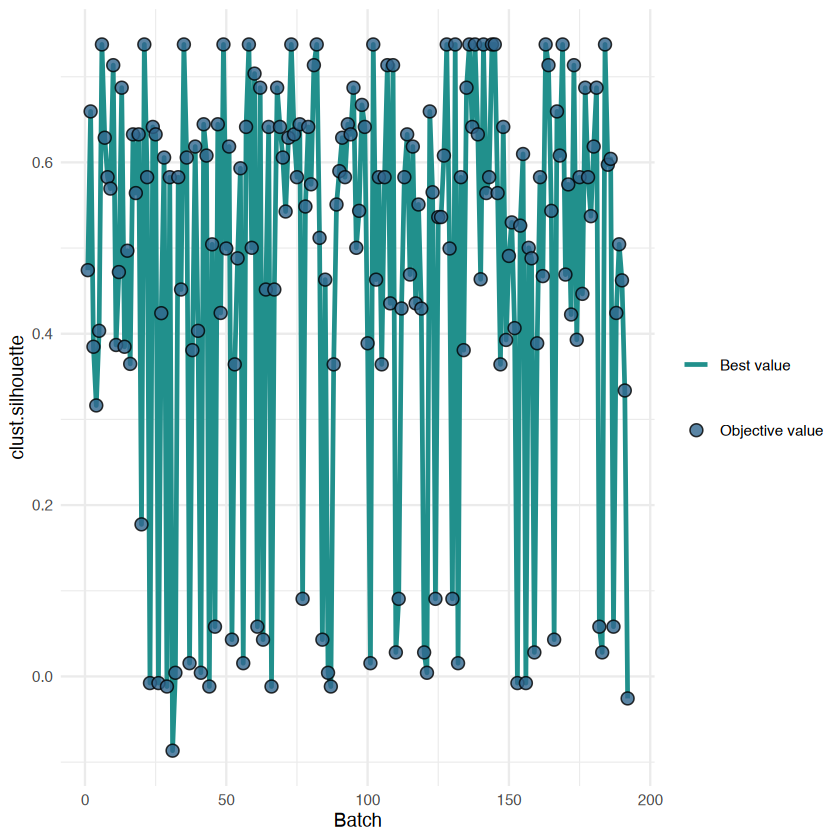

In [129]:
autoplot(instance, type = "performance")

In [ ]:
instance$result_learner_param_vals

# $scale.scale
# [1] TRUE

# $scale.robust
# [1] FALSE

# $hclust.distmethod
# [1] "minkowski"

# $hclust.k
# [1] 4

# $hclust.method
# [1] "ward.D2"

$scale.scale
[1] TRUE

$scale.robust
[1] FALSE

$hclust.distmethod
[1] "minkowski"

$hclust.k
[1] 4

$hclust.method
[1] "ward.D2"

In [ ]:
instance$archive %>% as.data.table() %>% head()

# hclust.method hclust.k hclust.distmethod clust.silhouette runtime_learners
# 1 ward.D2        8       maximum           0.4742018        0.043           
# 2 single         6       euclidean         0.6594717        0.084           
# 3 average       10       minkowski         0.3847952        0.041           
# 4 single         2       manhattan         0.3163174        0.030           
# 5 single        10       euclidean         0.4034004        0.033           
# 6 ward.D2        4       minkowski         0.7376570        0.029           
#   timestamp           warnings errors x_domain                        batch_nr
# 1 2025-05-29 20:25:16 0        0      ward.D2, 8      , maximum       1       
# 2 2025-05-29 20:25:16 0        0      single   , 6        , euclidean 2       
# 3 2025-05-29 20:25:16 0        0      average  , 10       , minkowski 3       
# 4 2025-05-29 20:25:16 0        0      single   , 2        , manhattan 4       
# 5 2025-05-29 20:25:16 0        0      single   , 10       , euclidean 5       
# 6 2025-05-29 20:25:16 0        0      ward.D2  , 4        , minkowski 6       
#   resample_result           
# 1 <environment: 0x1656f1a50>
# 2 <environment: 0x1704349c0>
# 3 <environment: 0x1657e2af0>
# 4 <environment: 0x1761d2050>
# 5 <environment: 0x1760f8b28>
# 6 <environment: 0x1657d0ab8>

hclust.method,hclust.k,hclust.distmethod,clust.silhouette,runtime_learners,timestamp,warnings,errors,x_domain,batch_nr,resample_result
<chr>,<int>,<chr>,<dbl>,<dbl>,<dttm>,<int>,<int>,<list>,<int>,<list>
ward.D2,8,maximum,0.4742018,0.043,2025-05-29 20:25:16,0,0,"ward.D2, 8 , maximum",1,<environment: 0x1656f1a50>
single,6,euclidean,0.6594717,0.084,2025-05-29 20:25:16,0,0,"single , 6 , euclidean",2,<environment: 0x1704349c0>
average,10,minkowski,0.3847952,0.041,2025-05-29 20:25:16,0,0,"average , 10 , minkowski",3,<environment: 0x1657e2af0>
single,2,manhattan,0.3163174,0.030,2025-05-29 20:25:16,0,0,"single , 2 , manhattan",4,<environment: 0x1761d2050>
single,10,euclidean,0.4034004,0.033,2025-05-29 20:25:16,0,0,"single , 10 , euclidean",5,<environment: 0x1760f8b28>
ward.D2,4,minkowski,0.7376570,0.029,2025-05-29 20:25:16,0,0,"ward.D2 , 4 , minkowski",6,<environment: 0x1657d0ab8>


In [132]:
instance$result_learner_param_vals

$scale.scale
[1] TRUE

$scale.robust
[1] FALSE

$hclust.distmethod
[1] "minkowski"

$hclust.k
[1] 4

$hclust.method
[1] "ward.D2"

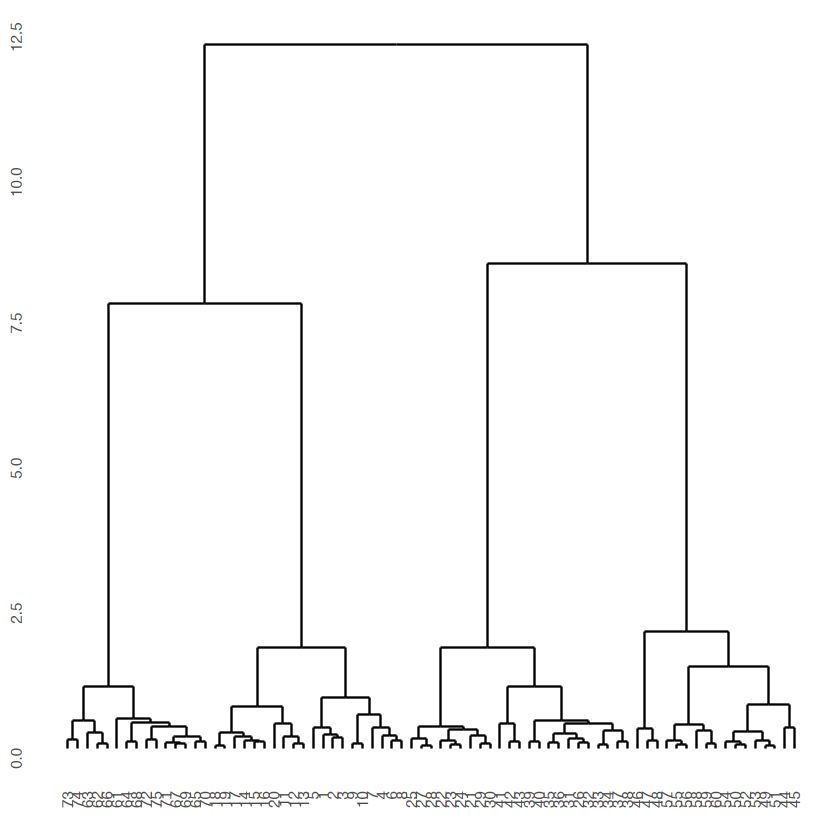

In [136]:
lrn_hclust$param_set$values <- instance$result_learner_param_vals

# 训练最终模型
lrn_hclust$train(tsk_ruspini)

# 可视化最终模型
autoplot(lrn_hclust$base_learner())

In [119]:
lrn_hclust$param_set$values

$scale.scale
[1] TRUE

$scale.robust
[1] FALSE

$clust.hclust.distmethod
[1] "euclidean"

$clust.hclust.k
[1] 2

In [124]:
instance$result_learner_param_vals

$scale.scale
[1] TRUE

$scale.robust
[1] FALSE

$clust.hclust.distmethod
[1] "euclidean"

$clust.hclust.k
[1] 2

$method
[1] "complete"

$k
[1] 6

$istmethod
[1] "binary"

In [ ]:
pred_hclust <- lrn_hclust$predict(tsk_ruspini)
pred_hclust$partition

# [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
# [39] 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [141]:
pred_hclust$partition %>% class()

[1] "integer"

Warning message in GGally::ggscatmat(data, color = "partition"):
"Factor variables are omitted in plot"


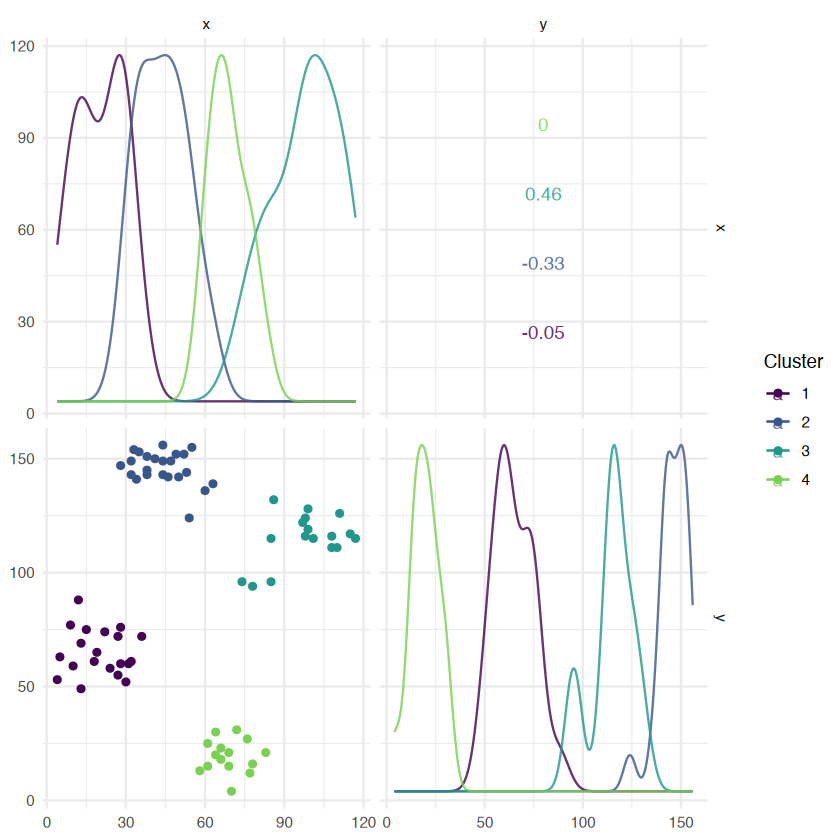

In [145]:
autoplot(pred_hclust, task = tsk_ruspini, type = "scatter")

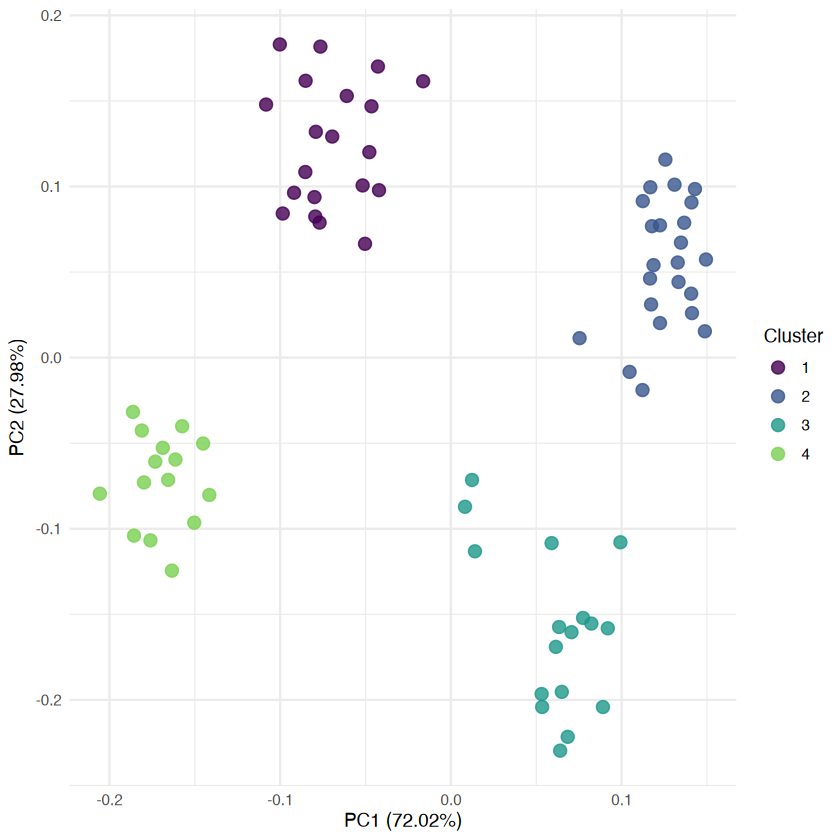

In [146]:
autoplot(pred_hclust, task = tsk_ruspini, type = "pca")

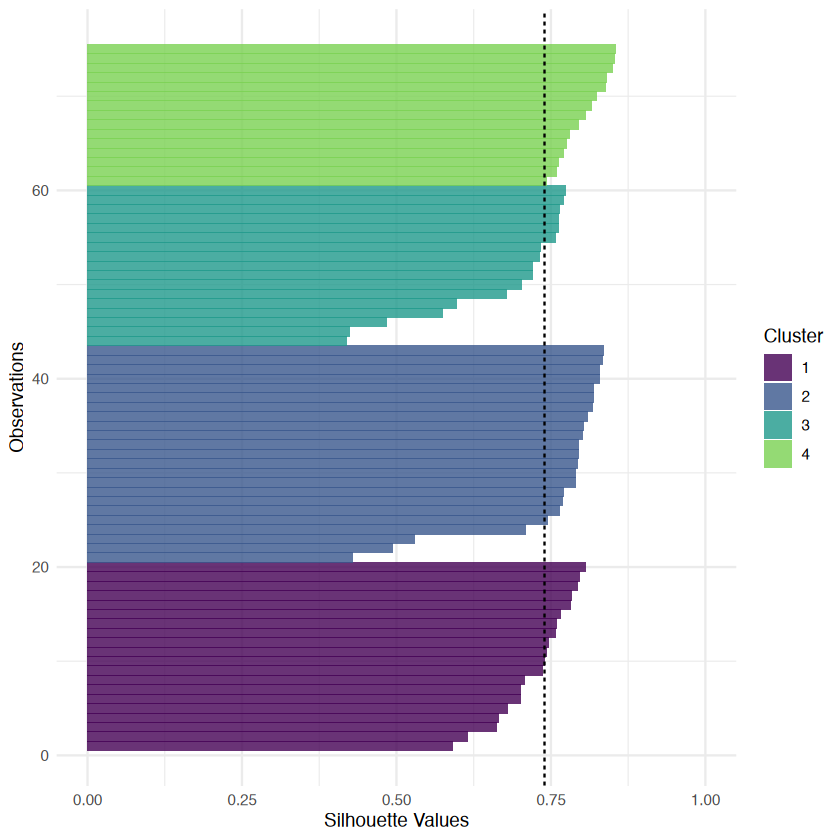

In [147]:
autoplot(pred_hclust, task = tsk_ruspini, type = "sil")

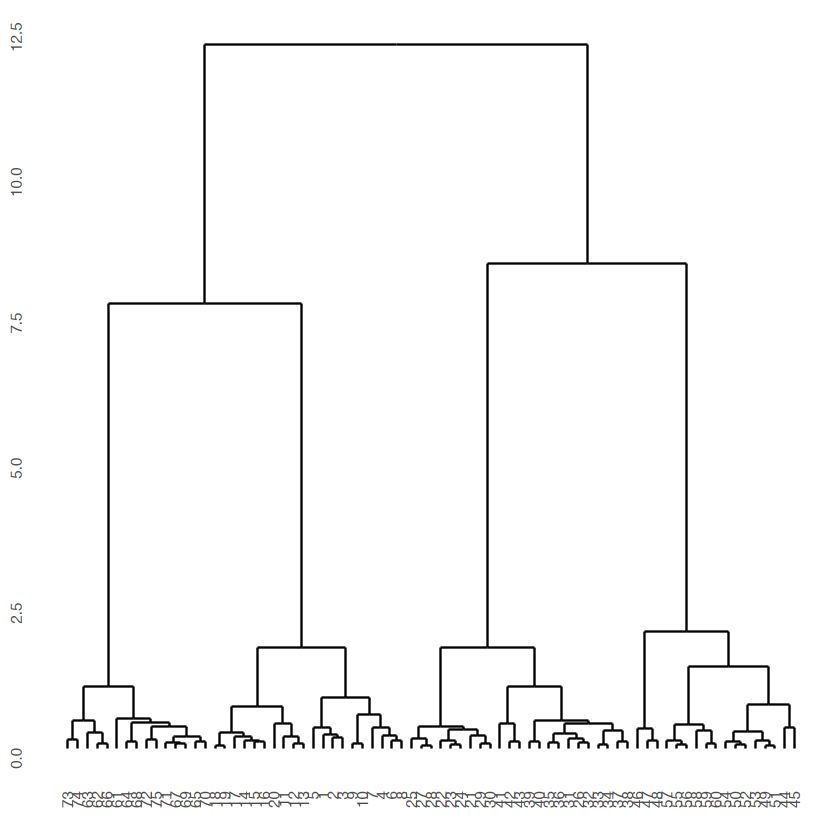

In [149]:
autoplot(lrn_hclust$base_learner())

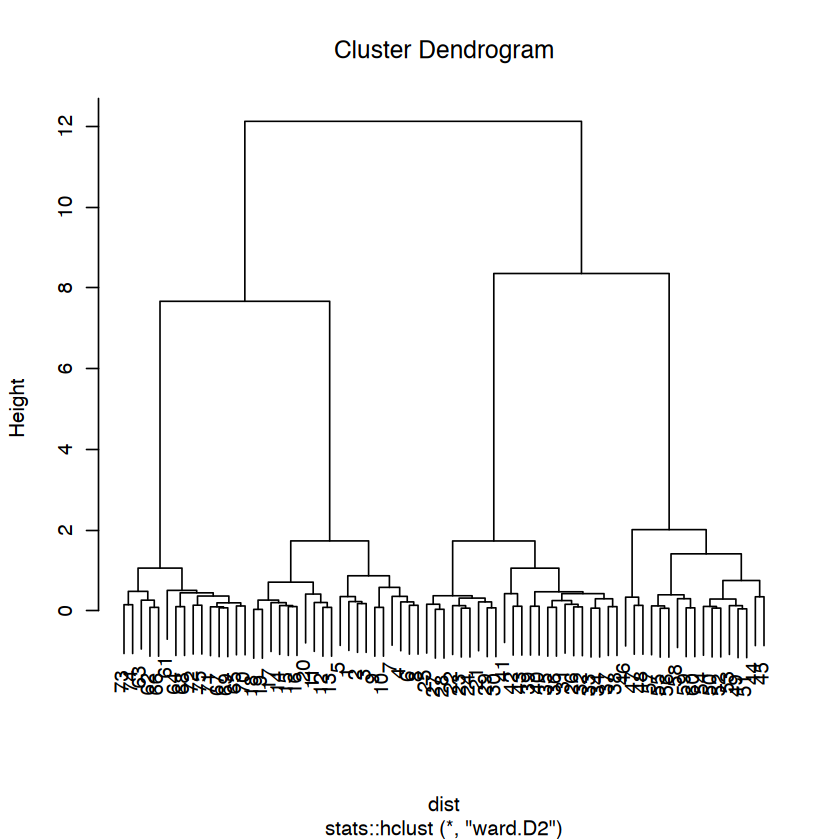

In [158]:
model_hclust <- lrn_hclust$model$hclust$model

plot(model_hclust)

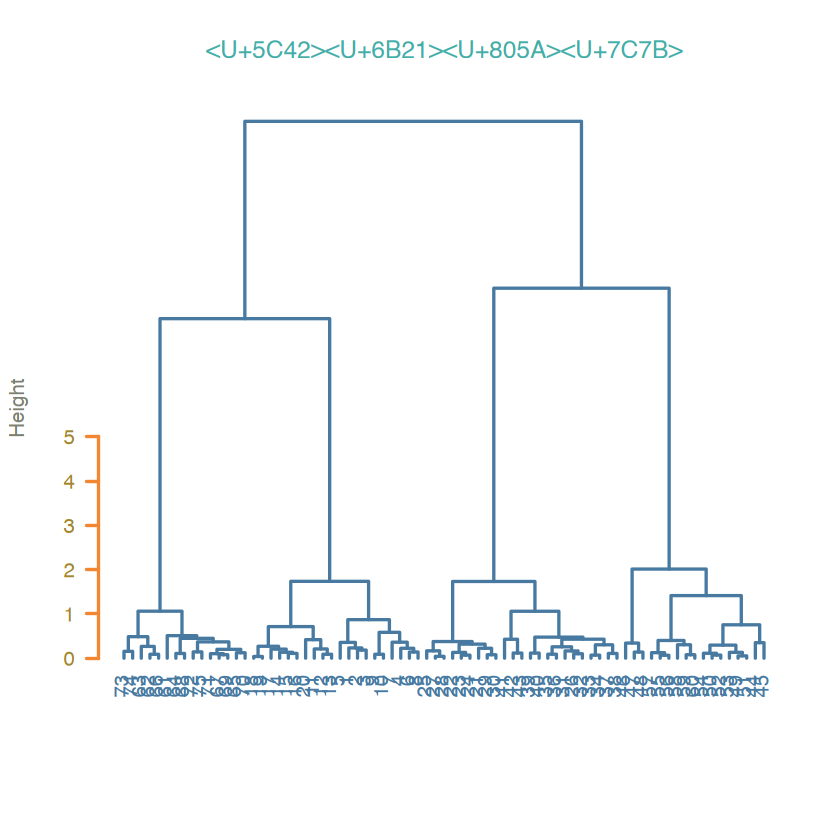

In [159]:
# 修改画布背景色
op <- par(bg = "grey90")

# 绘制层次聚类树状图并美化细节
plot(
  model_hclust,
  main = "层次聚类",         # 主标题
  sub = "",                 # 次标题
  xlab = "",                # x轴标题
  col = "#487AA1",          # 主体颜色
  col.main = "#45ADA8",     # 主标题颜色
  col.lab = "#7C8071",      # 坐标轴标签颜色
  col.axis = "#F38630",     # 坐标轴颜色
  lwd = 2,                  # 线条宽度
  lty = 1,                  # 线条类型
  hang = -1,                # 对齐
  axes = FALSE              # 不画坐标轴
)

# 自定义y轴
axis(
  side = 2, at = 0:5, col = "#F38630",
  labels = FALSE, lwd = 2
)
# 增加y轴刻度文字
mtext(
  0:5, side = 2, at = 0:5,
  line = 1, col = "#A38630", las = 2
)

# 恢复原始画布参数
par(op)

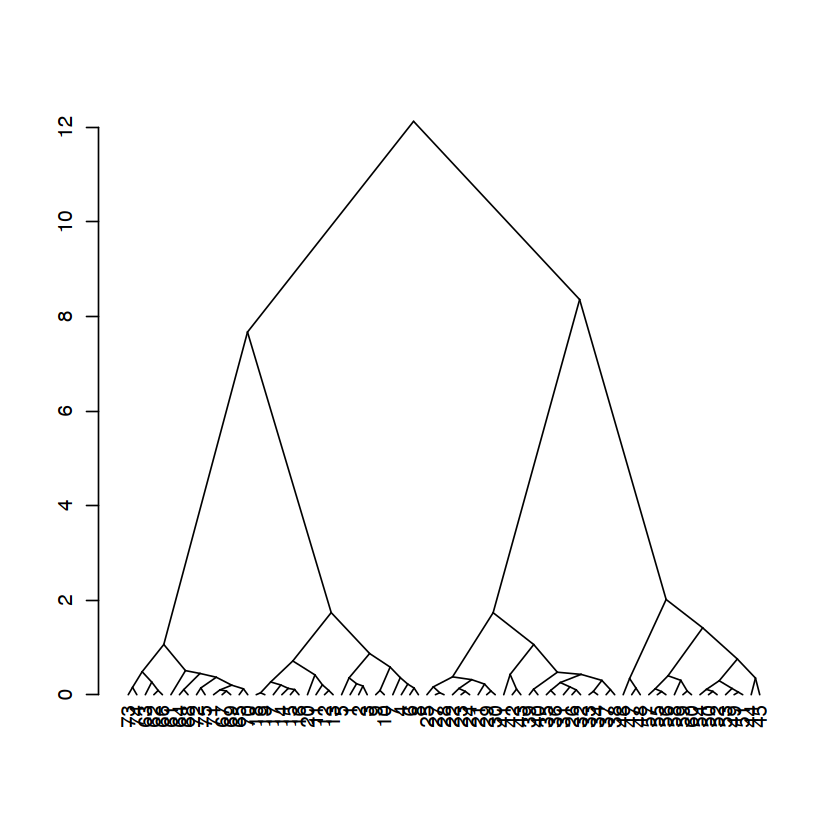

In [160]:
dhc <- as.dendrogram(model_hclust)
plot(dhc, type = "triangle") # 比如换个类型

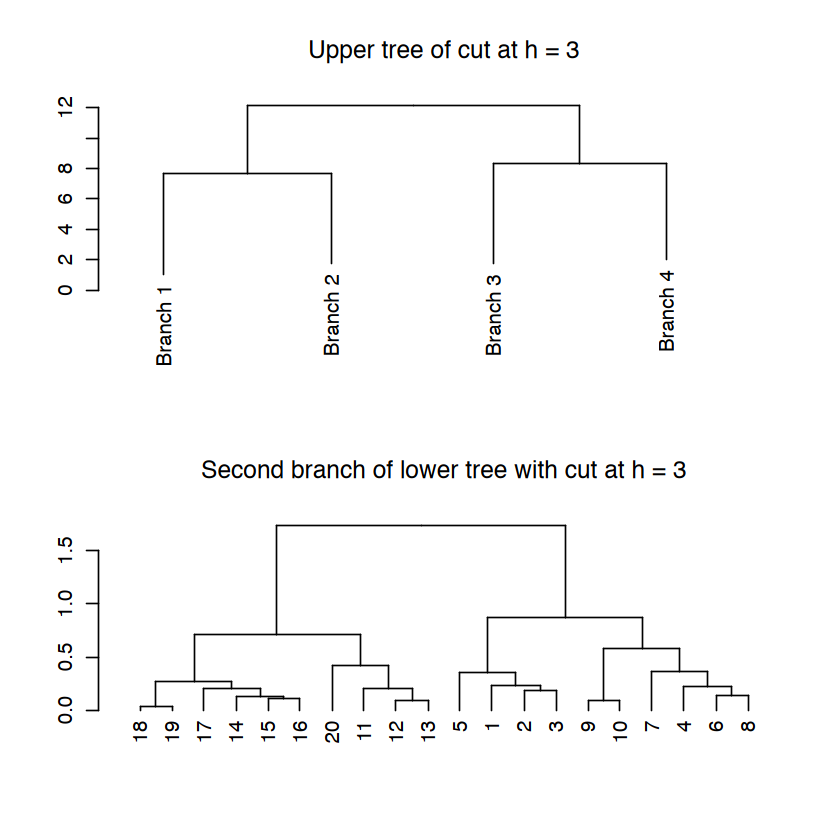

In [161]:
op <- par(mfrow = c(2, 1))

# 树高度大于3的部分
plot(
  cut(dhc, h = 3)$upper,
  main = "Upper tree of cut at h = 3"
)

# 树高度小于等于3的第二个分支
plot(
  cut(dhc, h = 3)$lower[[2]],
  main = "Second branch of lower tree with cut at h = 3"
)

par(op)

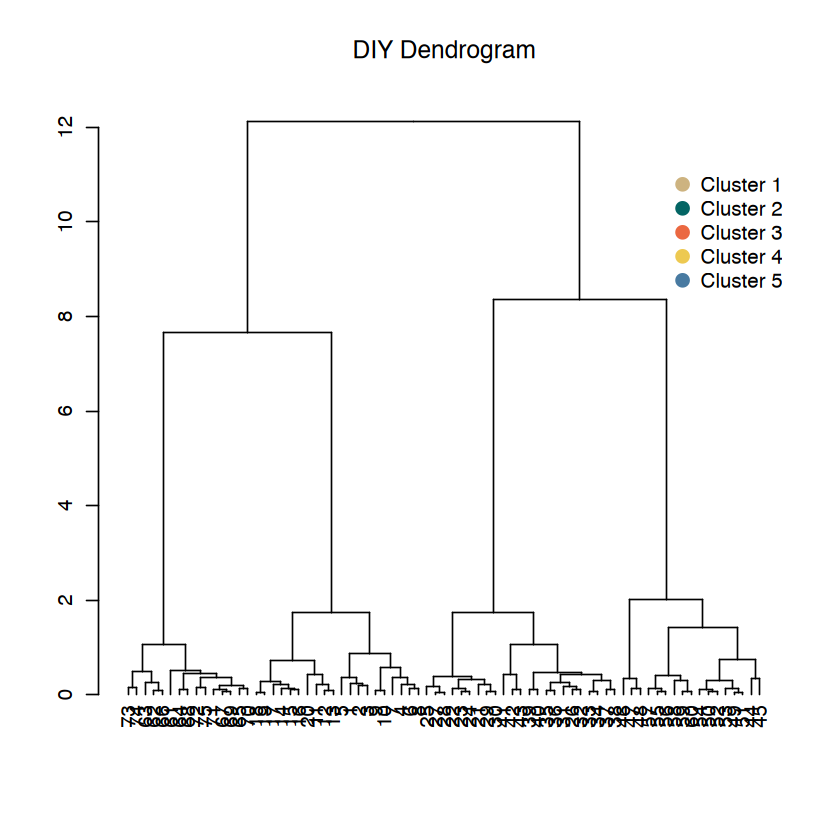

In [162]:
# 按照上面画出来的结果，我们可以分为5类，所以准备好5个颜色
labelColors <- c("#CDB380", "#036564", "#EB6841", "#EDC951", "#487AA1")

# 把聚类树分为5个类
clusMember <- cutree(model_hclust, k = 5)

# 给标签增加不同的颜色
colLab <- function(n) {
  if (is.leaf(n)) {
    a <- attributes(n)
    labCol <- labelColors[clusMember[which(names(clusMember) == a$label)]]
    attr(n, "nodePar") <- c(
      a$nodePar,
      list(
        cex = 1.5,         # 节点形状大小
        pch = 20,          # 节点形状
        col = labCol,      # 节点颜色
        lab.col = labCol,  # 标签颜色
        lab.font = 2,      # 标签字体，粗体
        lab.cex = 1        # 标签大小
      )
    )
  }
  n
}

# 把自定义标签颜色应用到聚类树中
diyDendro <- dendrapply(dhc, colLab)

# 画图
plot(diyDendro, main = "DIY Dendrogram")

# 加图例
legend(
  "topright",
  legend = paste0("Cluster ", 1:5),
  col = labelColors,
  pch = 20,
  bty = "n",
  pt.cex = 2,
  cex = 1,
  text.col = "black",
  horiz = FALSE,
  inset = c(0, 0.1)
)

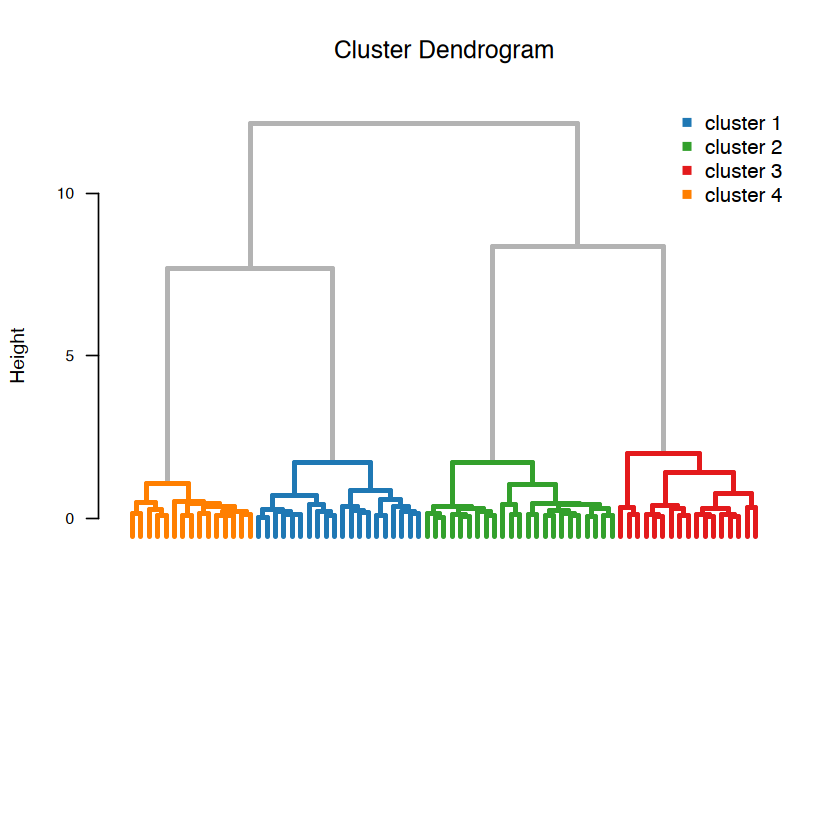

In [166]:
# 使用已存在的 model_hclust 对象，无需重复定义
# 使用 cutree 分割为 4 类
clusMember <- cutree(model_hclust, k = 4)
cl <- factor(clusMember, levels = 1:4, labels = paste("cluster", 1:4))

# 推荐在开头一次性加载包
library(colorhcplot)

# 绘制彩色聚类树
colorhcplot(model_hclust, cl, hang = -1)

# K-Means聚类

In [172]:
lrn_kmeans <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("clust.kmeans", id = "kmeans")
)

# 训练模型
lrn_kmeans$train(tsk_ruspini)

# 预测
pred_kmeans <- lrn_kmeans$predict(tsk_ruspini)
# 查看预测结果
pred_kmeans$partition

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Warning message in GGally::ggscatmat(data, color = "partition"):
"Factor variables are omitted in plot"


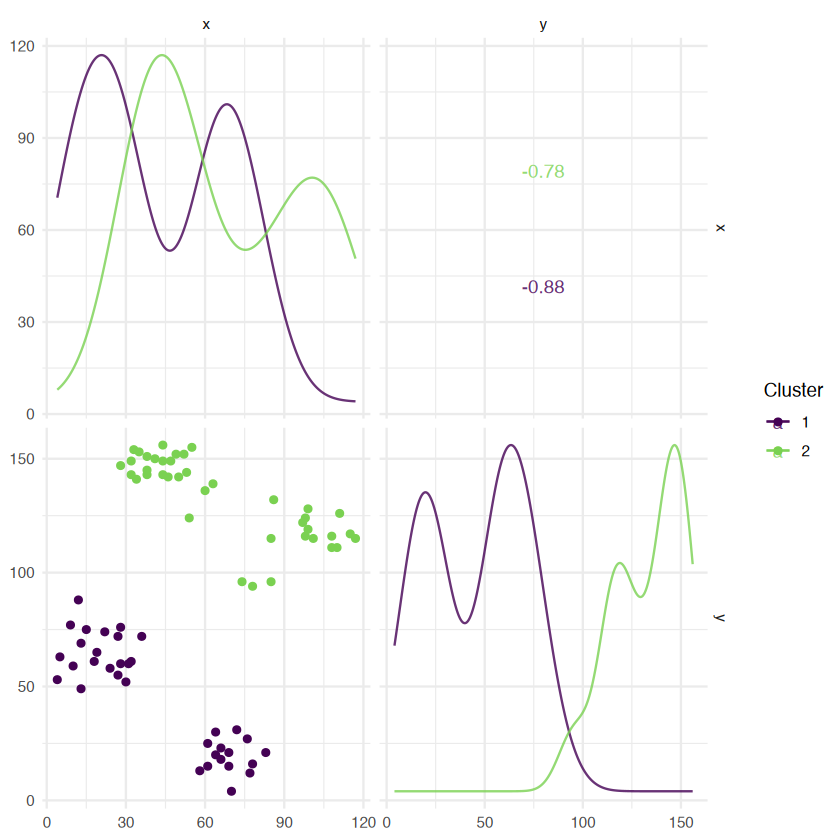

In [175]:
autoplot(pred_kmeans, task = tsk_ruspini)

In [ ]:
lrn_kmeans$pipeops_param_set$kmeans

# <ParamSet(5)>
#           id    class lower upper nlevels        default  value
#       <char>   <char> <num> <num>   <num>         <list> <list>
# 1:   centers ParamUty    NA    NA     Inf <NoDefault[0]>      2
# 2:  iter.max ParamInt     1   Inf     Inf             10 [NULL]
# 3: algorithm ParamFct    NA    NA       4  Hartigan-Wong [NULL]
# 4:    nstart ParamInt     1   Inf     Inf              1 [NULL]
# 5:     trace ParamInt     0   Inf     Inf              0 [NULL]

<ParamSet(5)>
          id    class lower upper nlevels        default  value
      <char>   <char> <num> <num>   <num>         <list> <list>
1:   centers ParamUty    NA    NA     Inf <NoDefault[0]>      2
2:  iter.max ParamInt     1   Inf     Inf             10 [NULL]
3: algorithm ParamFct    NA    NA       4  Hartigan-Wong [NULL]
4:    nstart ParamInt     1   Inf     Inf              1 [NULL]
5:     trace ParamInt     0   Inf     Inf              0 [NULL]

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustSil has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustSil.



INFO  [07:51:18.526] [bbotk] Starting to optimize 3 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [07:51:18.539] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:18.544] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:18.554] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:18.637] [mlr3] Finished benchmark
INFO  [07:51:18.659] [bbotk] Result of batch 1:
INFO  [07:51:18.661] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:18.661] [bbotk]               4    Hartigan-Wong            34         0.737657        0      0
INFO  [07:51:18.661] [bbotk]  runtime_learners                                uhash
INFO  [07:51:18.661] [bbotk]             0.073 6bb41da5-90da-44c1-8f15-d5458cfdc7f3
INFO  [07:51:18.668] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:18.675] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:18.679] [mlr3] Applying lea

Warning message:
"did not converge in 10 iterations
This happened PipeOp kmeans's $train()"


INFO  [07:51:19.158] [mlr3] Finished benchmark
INFO  [07:51:19.174] [bbotk] Result of batch 9:
INFO  [07:51:19.176] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:19.176] [bbotk]               8            Lloyd            45        0.4610256        0      0
INFO  [07:51:19.176] [bbotk]  runtime_learners                                uhash
INFO  [07:51:19.176] [bbotk]             0.031 9bdb8312-cac2-4689-9ece-f8e90c4eb915
INFO  [07:51:19.179] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:19.194] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:19.198] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:19.235] [mlr3] Finished benchmark
INFO  [07:51:19.250] [bbotk] Result of batch 10:
INFO  [07:51:19.251] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:19.251] [bbotk]               4    Hartigan-Wong            45         0.73765

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:19.707] [mlr3] Finished benchmark
INFO  [07:51:19.722] [bbotk] Result of batch 18:
INFO  [07:51:19.723] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:19.723] [bbotk]               5            Lloyd            45        0.6871715        0      0
INFO  [07:51:19.723] [bbotk]  runtime_learners                                uhash
INFO  [07:51:19.723] [bbotk]             0.027 d1326cf2-1edd-4c2d-9941-01c2dc6a7897
INFO  [07:51:19.725] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:19.728] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:19.730] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:19.770] [mlr3] Finished benchmark
INFO  [07:51:19.784] [bbotk] Result of batch 19:
INFO  [07:51:19.785] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:19.785] [bbotk]               7    Hartigan-Wong            45        0.47300

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:20.479] [mlr3] Finished benchmark
INFO  [07:51:20.496] [bbotk] Result of batch 31:
INFO  [07:51:20.497] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:20.497] [bbotk]               5            Lloyd            34        0.6871715        0      0
INFO  [07:51:20.497] [bbotk]  runtime_learners                                uhash
INFO  [07:51:20.497] [bbotk]             0.032 9893b5dc-f2ec-4bc7-83fd-3240efca66e9
INFO  [07:51:20.500] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:20.503] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:20.505] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:20.539] [mlr3] Finished benchmark
INFO  [07:51:20.556] [bbotk] Result of batch 32:
INFO  [07:51:20.557] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:20.557] [bbotk]               2         MacQueen            45        0.58272

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:21.286] [mlr3] Finished benchmark
INFO  [07:51:21.308] [bbotk] Result of batch 43:
INFO  [07:51:21.309] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:21.309] [bbotk]               7            Lloyd            39        0.4705724        0      0
INFO  [07:51:21.309] [bbotk]  runtime_learners                                uhash
INFO  [07:51:21.309] [bbotk]             0.034 7f1b8149-2426-48d5-8594-a3f12d754dff
INFO  [07:51:21.311] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:21.313] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:21.316] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:21.350] [mlr3] Finished benchmark
INFO  [07:51:21.362] [bbotk] Result of batch 44:
INFO  [07:51:21.363] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:21.363] [bbotk]              10            Lloyd            28         0.3750

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:21.783] [mlr3] Finished benchmark
INFO  [07:51:21.801] [bbotk] Result of batch 51:
INFO  [07:51:21.802] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:21.802] [bbotk]              10            Lloyd            50        0.3144366        0      0
INFO  [07:51:21.802] [bbotk]  runtime_learners                                uhash
INFO  [07:51:21.802] [bbotk]             0.032 eb574ab3-c708-456d-9d33-d2eca1a94d9a
INFO  [07:51:21.803] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:21.806] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:21.809] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:21.843] [mlr3] Finished benchmark
INFO  [07:51:21.856] [bbotk] Result of batch 52:
INFO  [07:51:21.857] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:21.857] [bbotk]               8    Hartigan-Wong            39        0.46102

Warning message:
"did not converge in 10 iterations
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"did not converge in 10 iterations
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:23.101] [mlr3] Finished benchmark
INFO  [07:51:23.119] [bbotk] Result of batch 70:
INFO  [07:51:23.120] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:23.120] [bbotk]               6            Lloyd            50        0.5761057        0      0
INFO  [07:51:23.120] [bbotk]  runtime_learners                                uhash
INFO  [07:51:23.120] [bbotk]             0.031 4403c7ad-b2a9-4751-a90d-1f32e11bb2a9
INFO  [07:51:23.122] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:23.125] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:23.128] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:23.162] [mlr3] Finished benchmark
INFO  [07:51:23.185] [bbotk] Result of batch 71:
INFO  [07:51:23.187] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:23.187] [bbotk]               6    Hartigan-Wong            34        0.58384

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:23.408] [mlr3] Finished benchmark
INFO  [07:51:23.423] [bbotk] Result of batch 75:
INFO  [07:51:23.424] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:23.424] [bbotk]               6            Lloyd            23        0.5942215        0      0
INFO  [07:51:23.424] [bbotk]  runtime_learners                                uhash
INFO  [07:51:23.424] [bbotk]             0.043 f3be06ff-14ec-40f5-923c-74745ccb3b17
INFO  [07:51:23.426] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:23.429] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:23.432] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:23.466] [mlr3] Finished benchmark
INFO  [07:51:23.481] [bbotk] Result of batch 76:
INFO  [07:51:23.482] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:23.482] [bbotk]               4    Hartigan-Wong            50         0.7376

Warning message:
"did not converge in 10 iterations
This happened PipeOp kmeans's $train()"
Warning message:
"did not converge in 10 iterations
This happened PipeOp kmeans's $train()"


INFO  [07:51:23.826] [mlr3] Finished benchmark
INFO  [07:51:23.842] [bbotk] Result of batch 82:
INFO  [07:51:23.844] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:23.844] [bbotk]               5            Lloyd            28        0.6871715        0      0
INFO  [07:51:23.844] [bbotk]  runtime_learners                                uhash
INFO  [07:51:23.844] [bbotk]             0.041 2e1c397f-23b4-46dc-b20f-aac7a2654fd6
INFO  [07:51:23.845] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:23.848] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:23.851] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)


Warning message:
"did not converge in 10 iterations
This happened PipeOp kmeans's $train()"


INFO  [07:51:23.886] [mlr3] Finished benchmark
INFO  [07:51:23.902] [bbotk] Result of batch 83:
INFO  [07:51:23.903] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:23.903] [bbotk]              10            Lloyd            12        0.4739962        0      0
INFO  [07:51:23.903] [bbotk]  runtime_learners                                uhash
INFO  [07:51:23.903] [bbotk]             0.031 81b5c43f-2e31-4c7e-919c-f2a3919be86f
INFO  [07:51:23.905] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:23.908] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:23.910] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:23.946] [mlr3] Finished benchmark
INFO  [07:51:23.961] [bbotk] Result of batch 84:
INFO  [07:51:23.962] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:23.962] [bbotk]               4    Hartigan-Wong            17         0.7376

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:25.723] [mlr3] Finished benchmark
INFO  [07:51:25.740] [bbotk] Result of batch 113:
INFO  [07:51:25.742] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:25.742] [bbotk]               8            Lloyd            17        0.4930786        0      0
INFO  [07:51:25.742] [bbotk]  runtime_learners                                uhash
INFO  [07:51:25.742] [bbotk]             0.032 87a615f8-0828-433e-a2b0-b3fac722814d
INFO  [07:51:25.794] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:25.857] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:25.867] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:25.924] [mlr3] Finished benchmark
INFO  [07:51:25.938] [bbotk] Result of batch 114:
INFO  [07:51:25.940] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:25.940] [bbotk]               8            Lloyd            28        0.482

Warning message:
"did not converge in 10 iterations
This happened PipeOp kmeans's $train()"


INFO  [07:51:27.368] [mlr3] Finished benchmark
INFO  [07:51:27.388] [bbotk] Result of batch 135:
INFO  [07:51:27.390] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:27.390] [bbotk]               4            Lloyd            12         0.737657        0      0
INFO  [07:51:27.390] [bbotk]  runtime_learners                                uhash
INFO  [07:51:27.390] [bbotk]              0.03 ad791b56-fb3d-4c82-b01e-0c5e5c6f4e4f
INFO  [07:51:27.391] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:27.394] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:27.397] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:27.448] [mlr3] Finished benchmark
INFO  [07:51:27.466] [bbotk] Result of batch 136:
INFO  [07:51:27.467] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:27.467] [bbotk]               3    Hartigan-Wong            50        0.632

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:27.536] [mlr3] Finished benchmark
INFO  [07:51:27.553] [bbotk] Result of batch 137:
INFO  [07:51:27.555] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:27.555] [bbotk]               8            Lloyd            39        0.4610256        0      0
INFO  [07:51:27.555] [bbotk]  runtime_learners                                uhash
INFO  [07:51:27.555] [bbotk]             0.054 82cdef78-e07a-4d94-b2b5-654699cc6892
INFO  [07:51:27.556] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:27.559] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:27.562] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:27.596] [mlr3] Finished benchmark
INFO  [07:51:27.611] [bbotk] Result of batch 138:
INFO  [07:51:27.612] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:27.612] [bbotk]               2            Lloyd            39        0.582

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:28.260] [mlr3] Finished benchmark
INFO  [07:51:28.278] [bbotk] Result of batch 148:
INFO  [07:51:28.280] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:28.280] [bbotk]               8            Lloyd            50        0.4610256        0      0
INFO  [07:51:28.280] [bbotk]  runtime_learners                                uhash
INFO  [07:51:28.280] [bbotk]             0.031 c4f78b72-1cfb-45fc-b3b6-f993d2039cbf
INFO  [07:51:28.282] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:28.285] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:28.287] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:28.323] [mlr3] Finished benchmark
INFO  [07:51:28.338] [bbotk] Result of batch 149:
INFO  [07:51:28.339] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:28.339] [bbotk]              10    Hartigan-Wong             1        0.348

Warning message:
"did not converge in 10 iterations
This happened PipeOp kmeans's $train()"


INFO  [07:51:28.386] [mlr3] Finished benchmark
INFO  [07:51:28.402] [bbotk] Result of batch 150:
INFO  [07:51:28.404] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:28.404] [bbotk]               5            Lloyd            50        0.6871715        0      0
INFO  [07:51:28.404] [bbotk]  runtime_learners                                uhash
INFO  [07:51:28.404] [bbotk]             0.033 e26f091b-7b16-46b7-9e4f-669c4b7d3380
INFO  [07:51:28.406] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:28.409] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:28.419] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:28.470] [mlr3] Finished benchmark
INFO  [07:51:28.485] [bbotk] Result of batch 151:
INFO  [07:51:28.487] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:28.487] [bbotk]               6            Lloyd            17        0.594

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:28.829] [mlr3] Finished benchmark
INFO  [07:51:28.859] [bbotk] Result of batch 157:
INFO  [07:51:28.862] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:28.862] [bbotk]               7            Lloyd            28        0.4730093        0      0
INFO  [07:51:28.862] [bbotk]  runtime_learners                                uhash
INFO  [07:51:28.862] [bbotk]              0.03 01e3f63a-e246-49db-a011-562216b67bae
INFO  [07:51:28.864] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:28.873] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:28.877] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:28.921] [mlr3] Finished benchmark
INFO  [07:51:28.936] [bbotk] Result of batch 158:
INFO  [07:51:28.937] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:28.937] [bbotk]              10         MacQueen             6         0.42

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:29.391] [mlr3] Finished benchmark
INFO  [07:51:29.405] [bbotk] Result of batch 165:
INFO  [07:51:29.407] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:29.407] [bbotk]               7            Lloyd            50        0.4234718        0      0
INFO  [07:51:29.407] [bbotk]  runtime_learners                                uhash
INFO  [07:51:29.407] [bbotk]             0.034 07420f7f-1c6b-4bda-8180-883796c93735
INFO  [07:51:29.409] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:29.412] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:29.415] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:29.450] [mlr3] Finished benchmark
INFO  [07:51:29.464] [bbotk] Result of batch 166:
INFO  [07:51:29.465] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:29.465] [bbotk]              10         MacQueen            17        0.331

Warning message:
"did not converge in 10 iterations
This happened PipeOp kmeans's $train()"


INFO  [07:51:29.884] [mlr3] Finished benchmark
INFO  [07:51:29.900] [bbotk] Result of batch 173:
INFO  [07:51:29.902] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:29.902] [bbotk]               7            Lloyd            12        0.4848289        0      0
INFO  [07:51:29.902] [bbotk]  runtime_learners                                uhash
INFO  [07:51:29.902] [bbotk]             0.029 38889b1c-d02f-4c38-8a1a-b68f340feb1f
INFO  [07:51:29.904] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:29.907] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:29.909] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:29.954] [mlr3] Finished benchmark
INFO  [07:51:29.975] [bbotk] Result of batch 174:
INFO  [07:51:29.976] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:29.976] [bbotk]               4            Lloyd            34         0.73

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:30.640] [mlr3] Finished benchmark
INFO  [07:51:30.656] [bbotk] Result of batch 185:
INFO  [07:51:30.657] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:30.657] [bbotk]               7            Lloyd            17        0.5651811        0      0
INFO  [07:51:30.657] [bbotk]  runtime_learners                                uhash
INFO  [07:51:30.657] [bbotk]             0.029 45e1377f-9ab1-448d-830f-345a30d125ee
INFO  [07:51:30.659] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:30.662] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:30.665] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:30.700] [mlr3] Finished benchmark
INFO  [07:51:30.715] [bbotk] Result of batch 186:
INFO  [07:51:30.717] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:30.717] [bbotk]               7    Hartigan-Wong             6        0.473

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:31.604] [mlr3] Finished benchmark
INFO  [07:51:31.622] [bbotk] Result of batch 199:
INFO  [07:51:31.623] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:31.623] [bbotk]               8            Lloyd            34        0.4585887        0      0
INFO  [07:51:31.623] [bbotk]  runtime_learners                                uhash
INFO  [07:51:31.623] [bbotk]             0.031 f6e4f54e-61fa-4c1e-9ddc-00a532d67862
INFO  [07:51:31.625] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:31.627] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:31.630] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:31.667] [mlr3] Finished benchmark
INFO  [07:51:31.683] [bbotk] Result of batch 200:
INFO  [07:51:31.685] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:31.685] [bbotk]               3            Lloyd            50        0.632

Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:31.875] [mlr3] Finished benchmark
INFO  [07:51:31.893] [bbotk] Result of batch 203:
INFO  [07:51:31.895] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:31.895] [bbotk]              10            Lloyd            23        0.3743243        0      0
INFO  [07:51:31.895] [bbotk]  runtime_learners                                uhash
INFO  [07:51:31.895] [bbotk]             0.033 fd7bded4-027b-4c3b-a42e-52aa25ac12d6
INFO  [07:51:31.896] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:31.902] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:31.905] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:32.061] [mlr3] Finished benchmark
INFO  [07:51:32.089] [bbotk] Result of batch 204:
INFO  [07:51:32.091] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:32.091] [bbotk]               2            Lloyd             1        0.364

Warning message:
"did not converge in 10 iterations
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"
Warning message:
"empty cluster: try a better set of initial centers
This happened PipeOp kmeans's $train()"


INFO  [07:51:33.747] [mlr3] Finished benchmark
INFO  [07:51:33.763] [bbotk] Result of batch 230:
INFO  [07:51:33.765] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:33.765] [bbotk]               6            Lloyd            45        0.5838494        0      0
INFO  [07:51:33.765] [bbotk]  runtime_learners                                uhash
INFO  [07:51:33.765] [bbotk]             0.032 6ccf0708-bed3-4b1e-96db-185d9b6f3987
INFO  [07:51:33.766] [bbotk] Evaluating 1 configuration(s)
INFO  [07:51:33.769] [mlr3] Running benchmark with 1 resampling iterations
INFO  [07:51:33.772] [mlr3] Applying learner 'scale.kmeans' on task 'ruspini' (iter 1/1)
INFO  [07:51:33.804] [mlr3] Finished benchmark
INFO  [07:51:33.818] [bbotk] Result of batch 231:
INFO  [07:51:33.819] [bbotk]  kmeans.centers kmeans.algorithm kmeans.nstart clust.silhouette warnings errors
INFO  [07:51:33.819] [bbotk]               5         MacQueen            50        0.687

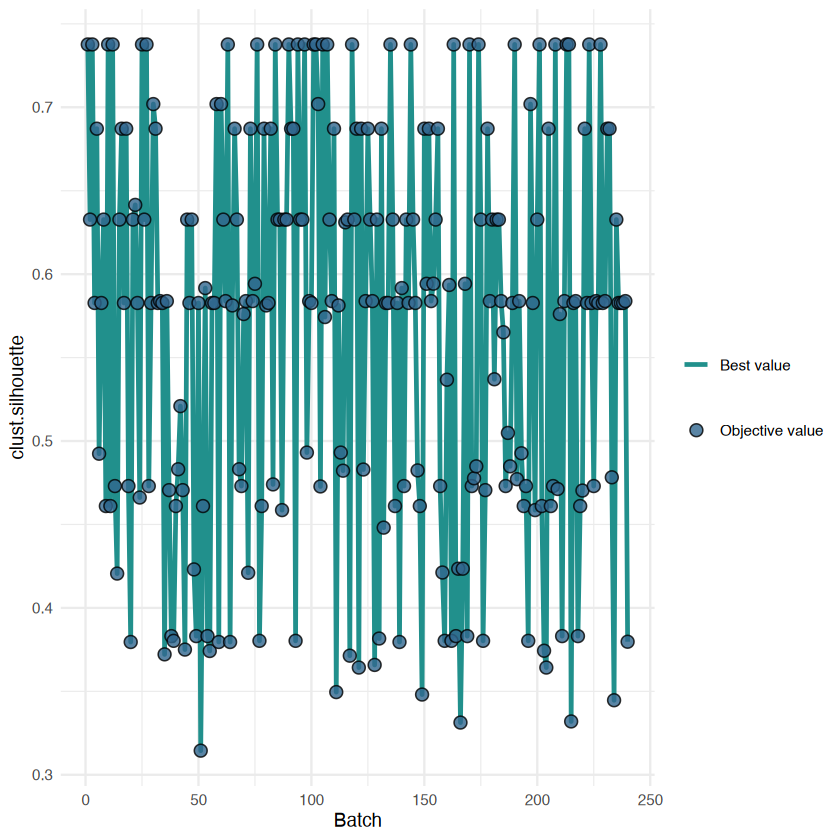

In [182]:
# 定义任务
tsk_ruspini <- tsk("ruspini")

# 定义学习器
lrn_kmeans <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("clust.kmeans", id = "kmeans")
)

# 定义参数空间
search_space <- ps(
  kmeans.centers = p_int(lower = 2L, upper = 10L),  # 聚类数
  kmeans.algorithm = p_fct(c("Hartigan-Wong", "Lloyd", "MacQueen")),  # 聚类算法
  kmeans.nstart = p_int(lower = 1L, upper = 50L)  # 启动次数
)

# 定义度量指标
msr <- msr("clust.silhouette")

# 定义调优器
tnr_grid <- tnr("grid_search", resolution = 10L)

# 开始调参
instance <- tune(
  tuner = tnr_grid,
  task = tsk_ruspini,
  learner = lrn_kmeans,
  resampling = rsmp("insample"),
  measures = msr,
  search_space = search_space
)

# 查看调参结果
autoplot(instance, type = "performance")

In [ ]:
instance$result_learner_param_vals

# $scale.scale
# [1] TRUE

# $scale.robust
# [1] FALSE

# $kmeans.centers
# [1] 4

# $kmeans.algorithm
# [1] "Hartigan-Wong"

# $kmeans.nstart
# [1] 34

$scale.scale
[1] TRUE

$scale.robust
[1] FALSE

$kmeans.centers
[1] 4

$kmeans.algorithm
[1] "Hartigan-Wong"

$kmeans.nstart
[1] 34

In [ ]:
# 传入最佳参数值
lrn_kmeans$param_set$values <- instance$result_learner_param_vals

# 训练最终模型
lrn_kmeans$train(tsk_ruspini)

# 查看得分
pred_kmeans <- lrn_kmeans$predict(tsk_ruspini)
pred_kmeans$score(msr, task = tsk_ruspini)

# clust.silhouette 
#         0.737657

clust.silhouette 
        0.737657

Warning message in GGally::ggscatmat(data, color = "partition"):
"Factor variables are omitted in plot"


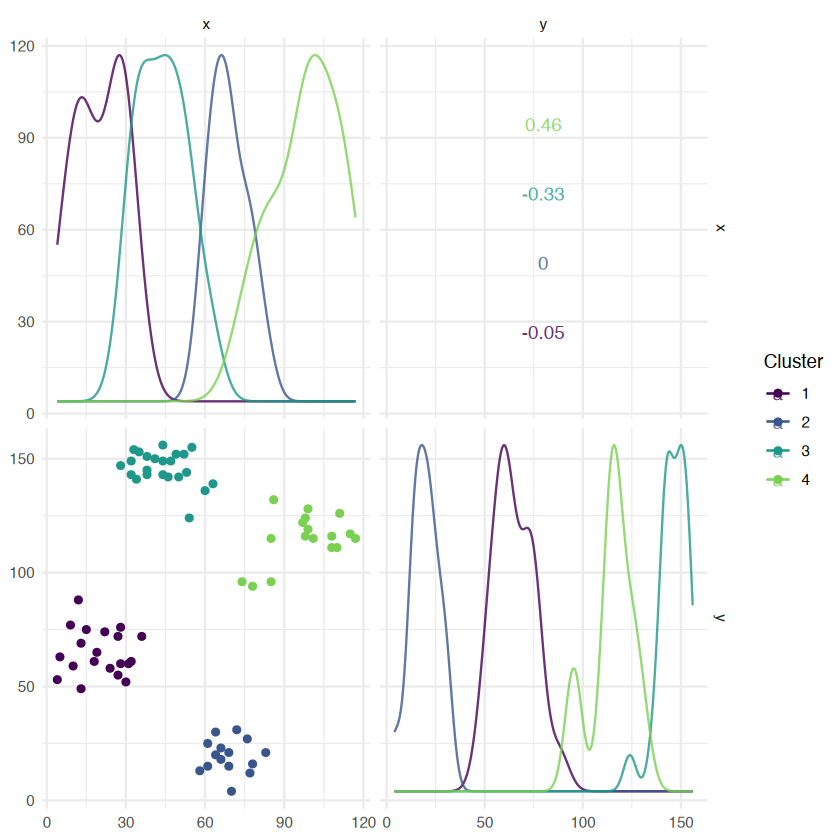

In [190]:
autoplot(pred_kmeans, task = tsk_ruspini, type = "scatter")

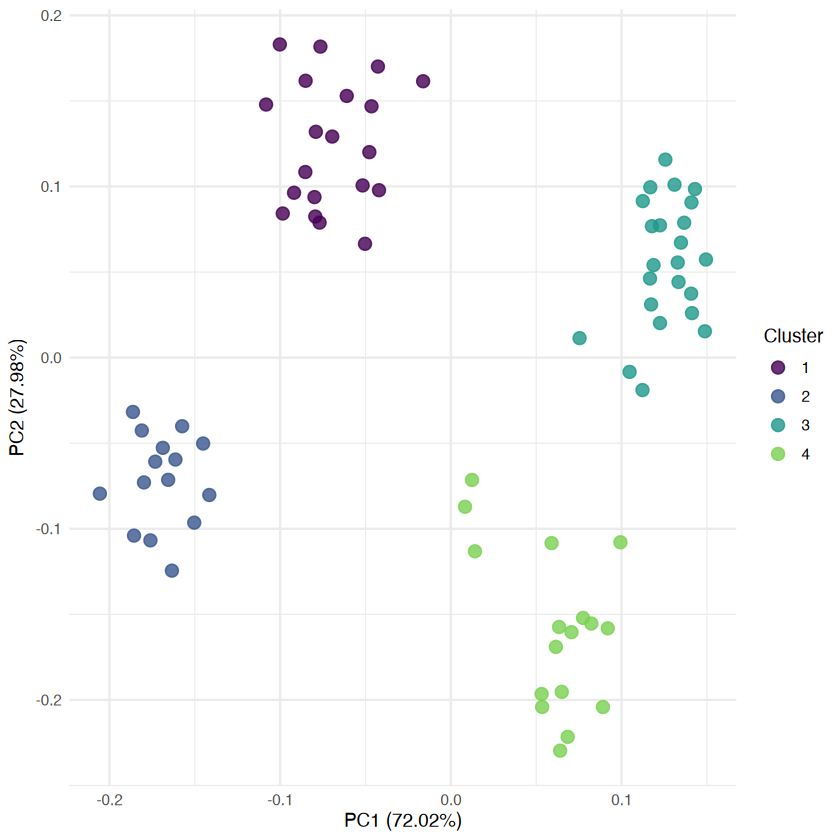

In [191]:
autoplot(pred_kmeans, task = tsk_ruspini, type = "pca")

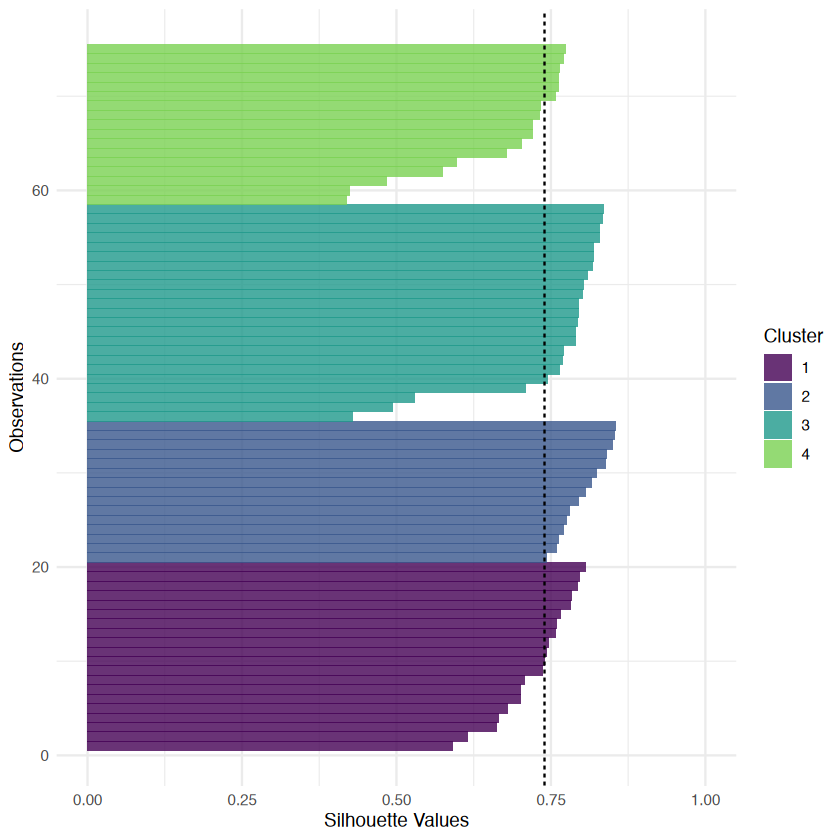

In [192]:
autoplot(pred_kmeans, task = tsk_ruspini, type = "sil")

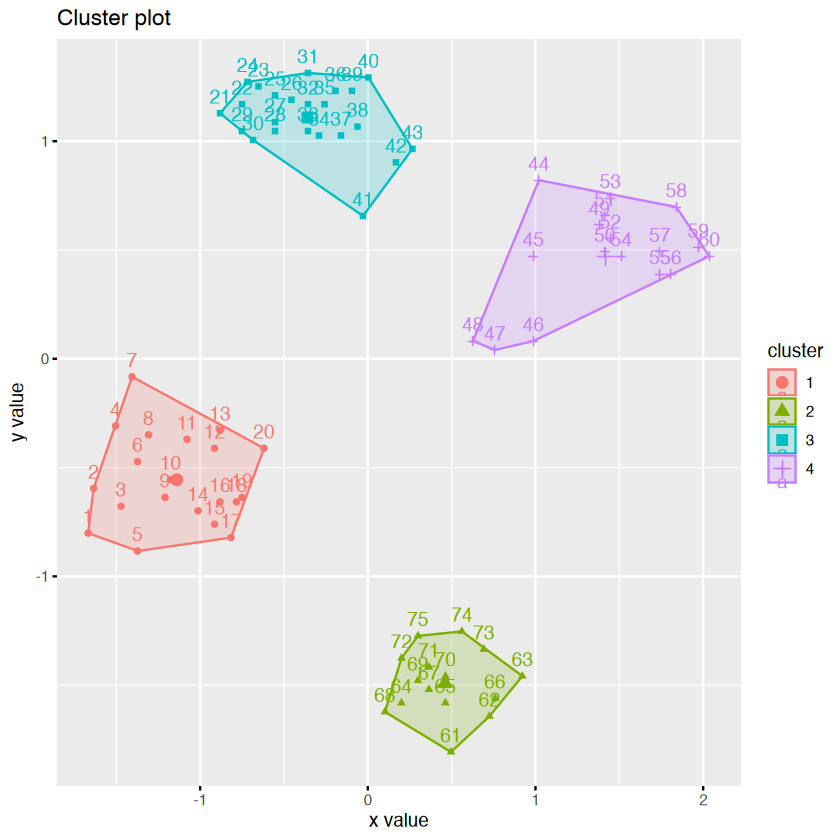

In [204]:
library(factoextra)

# 提取模型
model_kmeans <- lrn_kmeans$model$kmeans$model

# 提取数据
data_ruspini <- tsk_ruspini$data()

# 绘图
fviz_cluster(model_kmeans, data = data_ruspini)

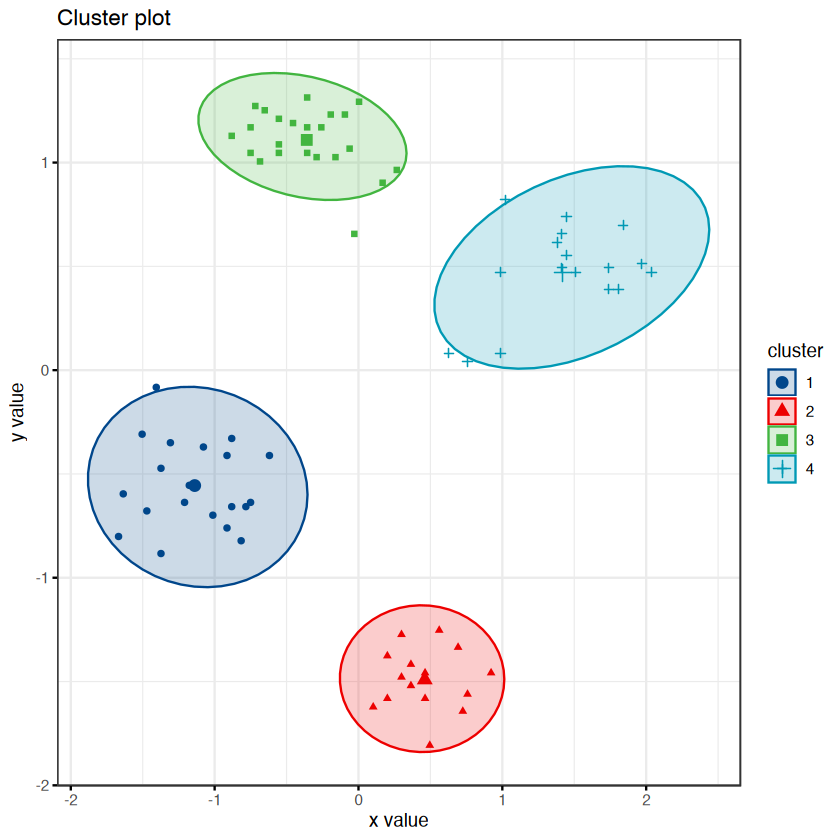

In [208]:
fviz_cluster(
  model_kmeans,
  data = data_ruspini,
  ellipse = TRUE,           # 增加椭圆
  ellipse.type = "t",       # 椭圆类型
  geom = "point",           # 只显示点不要文字
  palette = "lancet",       # 支持超多配色方案
  ggtheme = theme_bw()      # 支持更换主题
)

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
i The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


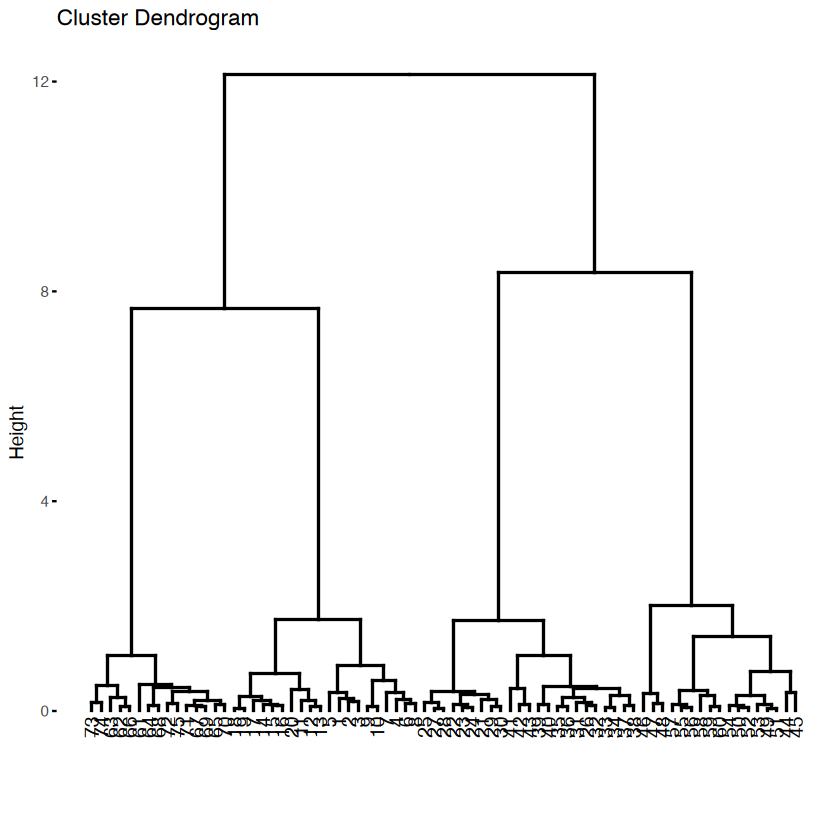

In [205]:
fviz_dend(model_hclust, data = data_ruspini)

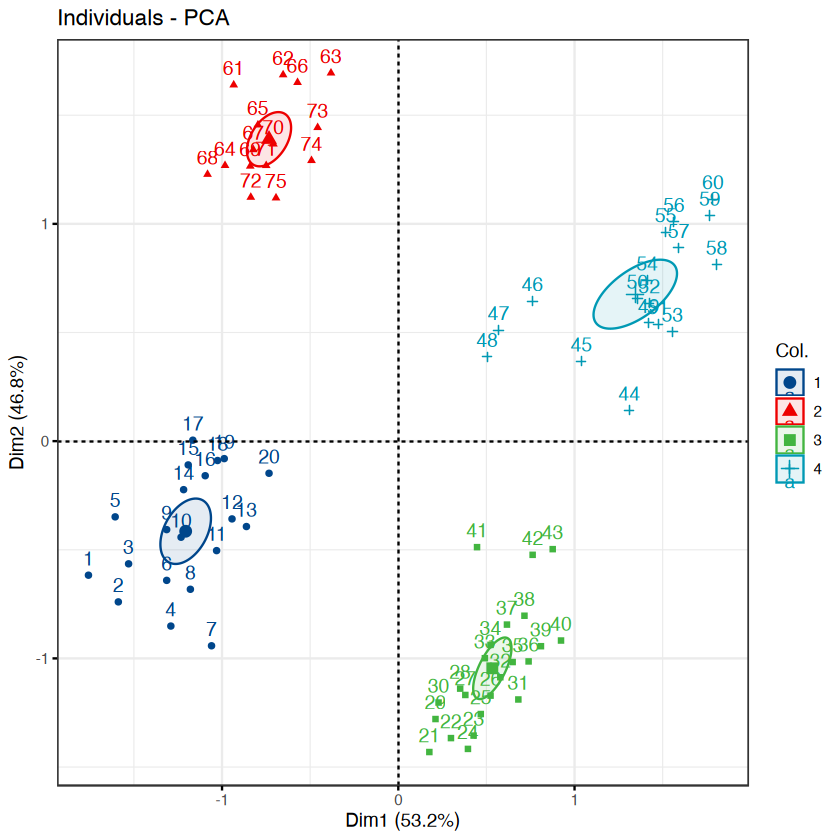

In [211]:
library(FactoMineR)

# 执行PCA分析
res_pca <- PCA(data_ruspini, graph = FALSE)

# 绘制PCA结果
fviz_pca_ind(
  res_pca,
  col.ind = as.factor(pred_kmeans$partition),  # 使用聚类结果着色
  palette = "lancet",                # 支持超多配色方案
  addEllipses = TRUE,                # 增加椭圆
  ellipse.type = "confidence",        # 椭圆类型
  ggtheme = theme_bw()                # 支持更换主题
)

  cluster size ave.sil.width
1       1   20          0.73
2       2   15          0.80
3       3   23          0.75
4       4   17          0.67


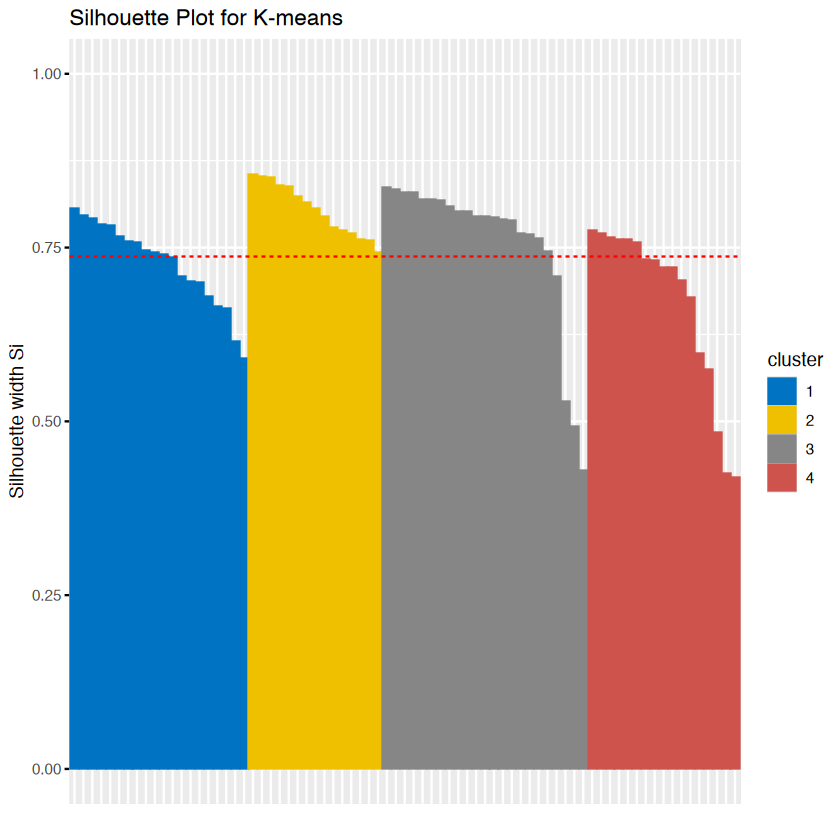

In [ ]:
library(cluster)

# 计算轮廓系数
sil_km <- silhouette(pred_kmeans$partition, dist(data_ruspini))

# 可视化
fviz_silhouette(
  sil_km,
  palette = "jco",
  print.summary = TRUE,     # 显示统计摘要
  main = "Silhouette Plot for K-means",
)

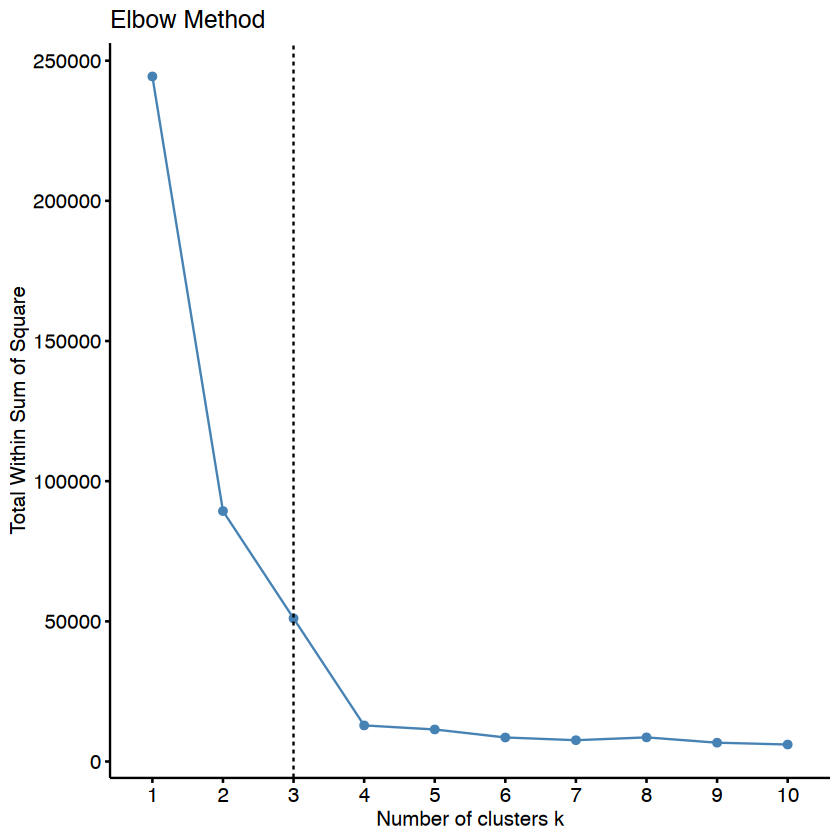

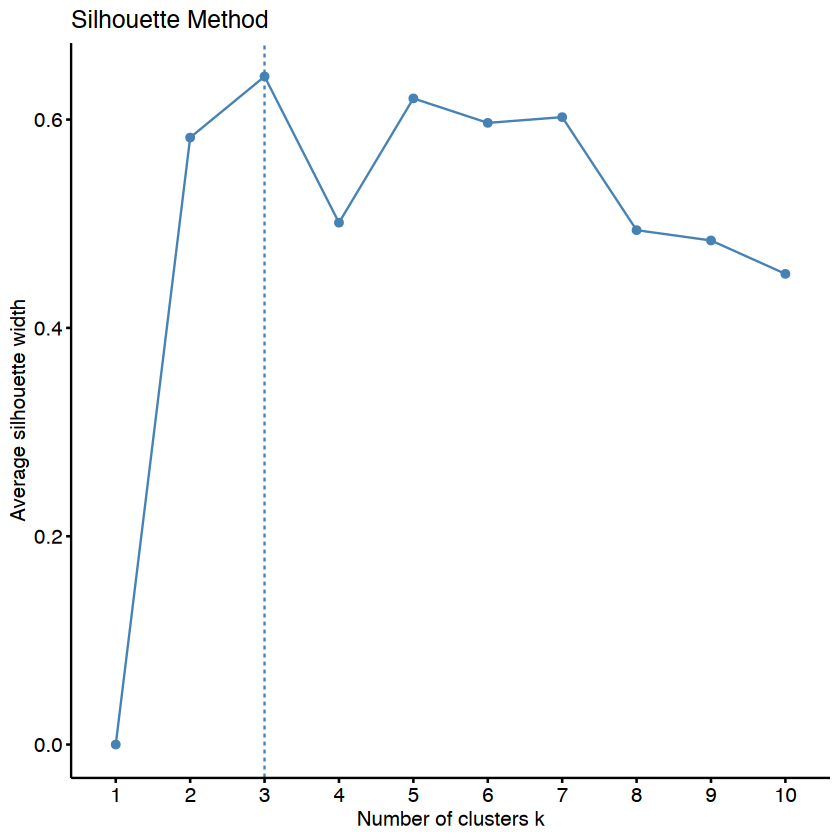

In [216]:
# 综合多种指标确定最佳k值
fviz_nbclust(data_ruspini, kmeans, method = "wss", k.max = 10) +  # 肘部法则
  geom_vline(xintercept = 3, linetype = 2) +
  labs(title = "Elbow Method")

fviz_nbclust(data_ruspini, kmeans, method = "silhouette", k.max = 10) +  # 轮廓系数
  labs(title = "Silhouette Method")

# PAM聚类

In [219]:
# 定义学习期
lrn_pam <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("clust.pam", id = "pam")
)

# 训练模型
lrn_pam$train(tsk_ruspini)

# 预测
pred_pam <- lrn_pam$predict(tsk_ruspini)
# 查看预测结果
pred_pam$partition

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
lrn_pam$pipeops_param_set$pam

# <ParamSet(7)>
#           id    class lower upper nlevels        default  value
#       <char>   <char> <num> <num>   <num>         <list> <list>
# 1:         k ParamInt     1   Inf     Inf <NoDefault[0]>      2
# 2:    metric ParamFct    NA    NA       2 <NoDefault[0]> [NULL]
# 3:   medoids ParamUty    NA    NA     Inf         [NULL] [NULL]
# 4:     stand ParamLgl    NA    NA       2          FALSE [NULL]
# 5:   do.swap ParamLgl    NA    NA       2           TRUE [NULL]
# 6:   pamonce ParamInt     0     5       6              0 [NULL]
# 7: trace.lev ParamInt     0   Inf     Inf              0 [NULL]

<ParamSet(7)>
          id    class lower upper nlevels        default  value
      <char>   <char> <num> <num>   <num>         <list> <list>
1:         k ParamInt     1   Inf     Inf <NoDefault[0]>      2
2:    metric ParamFct    NA    NA       2 <NoDefault[0]> [NULL]
3:   medoids ParamUty    NA    NA     Inf         [NULL] [NULL]
4:     stand ParamLgl    NA    NA       2          FALSE [NULL]
5:   do.swap ParamLgl    NA    NA       2           TRUE [NULL]
6:   pamonce ParamInt     0     5       6              0 [NULL]
7: trace.lev ParamInt     0   Inf     Inf              0 [NULL]

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustSil has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustSil.



INFO  [09:08:01.022] [bbotk] Starting to optimize 4 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [09:08:01.030] [bbotk] Evaluating 1 configuration(s)
INFO  [09:08:01.033] [mlr3] Running benchmark with 1 resampling iterations
INFO  [09:08:01.036] [mlr3] Applying learner 'scale.pam' on task 'ruspini' (iter 1/1)
INFO  [09:08:01.100] [mlr3] Finished benchmark
INFO  [09:08:01.121] [bbotk] Result of batch 1:
INFO  [09:08:01.123] [bbotk]  pam.k pam.metric pam.do.swap pam.pamonce clust.silhouette warnings errors
INFO  [09:08:01.123] [bbotk]     10  manhattan        TRUE           2        0.3323392        0      0
INFO  [09:08:01.123] [bbotk]  runtime_learners                                uhash
INFO  [09:08:01.123] [bbotk]             0.059 8fa12758-56cd-4831-bc02-e10db5984efd
INFO  [09:08:01.125] [bbotk] Evaluating 1 configuration(s)
INFO  [09:08:01.129] [mlr3] Running benchmark with 1 resampling iterations
INFO  [09:08:01.147] [mlr3] Applying learner 'scale.p

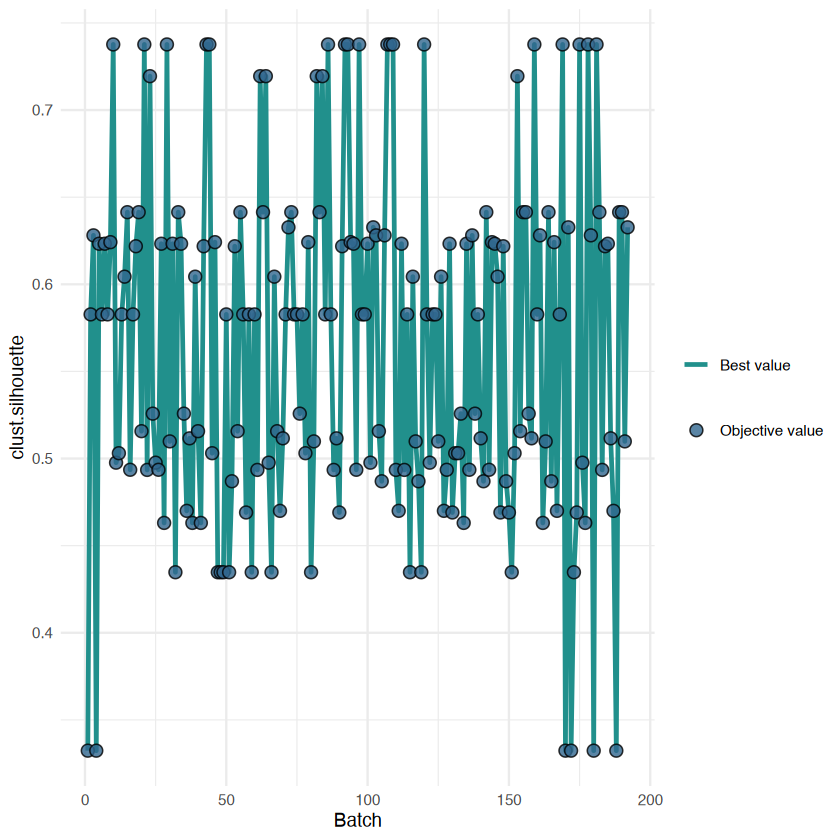

In [222]:
# 定义任务
tsk_ruspini <- tsk("ruspini")

# 定义学习器
lrn_pam <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("clust.pam", id = "pam")
)

# 定义参数空间
search_space <- ps(
  pam.k = p_int(lower = 2L, upper = 10L),  # 聚类数
  pam.metric = p_fct(
    c("euclidean", "manhattan")
  ),  # 距离度量
  pam.do.swap = p_lgl(),  # 是否交换
  pam.pamonce = p_int(lower = 0L, upper = 5L)  # 启动次数
)

# 定义度量指标
msr <- msr("clust.silhouette")

# 定义调优器
tnr_grid <- tnr("grid_search", resolution = 10L)

# 开始调参
instance <- tune(
  tuner = tnr_grid,
  task = tsk_ruspini,
  learner = lrn_pam,
  resampling = rsmp("insample"),
  measures = msr,
  search_space = search_space
)

# 查看调参结果
autoplot(instance, type = "performance")

In [ ]:
instance$result_learner_param_vals

# $scale.scale
# [1] TRUE

# $scale.robust
# [1] FALSE

# $pam.k
# [1] 4

# $pam.metric
# [1] "manhattan"

# $pam.do.swap
# [1] TRUE

# $pam.pamonce
# [1] 2

$scale.scale
[1] TRUE

$scale.robust
[1] FALSE

$pam.k
[1] 4

$pam.metric
[1] "manhattan"

$pam.do.swap
[1] TRUE

$pam.pamonce
[1] 2

In [ ]:
# 传入最优参数
lrn_pam$param_set$values <- instance$result_learner_param_vals

# 训练最终模型
lrn_pam$train(tsk_ruspini)

# 查看得分
pred_pam <- lrn_pam$predict(tsk_ruspini)
pred_pam$score(msr, task = tsk_ruspini)

# clust.silhouette 
#         0.737657

clust.silhouette 
        0.737657

Warning message in GGally::ggscatmat(data, color = "partition"):
"Factor variables are omitted in plot"


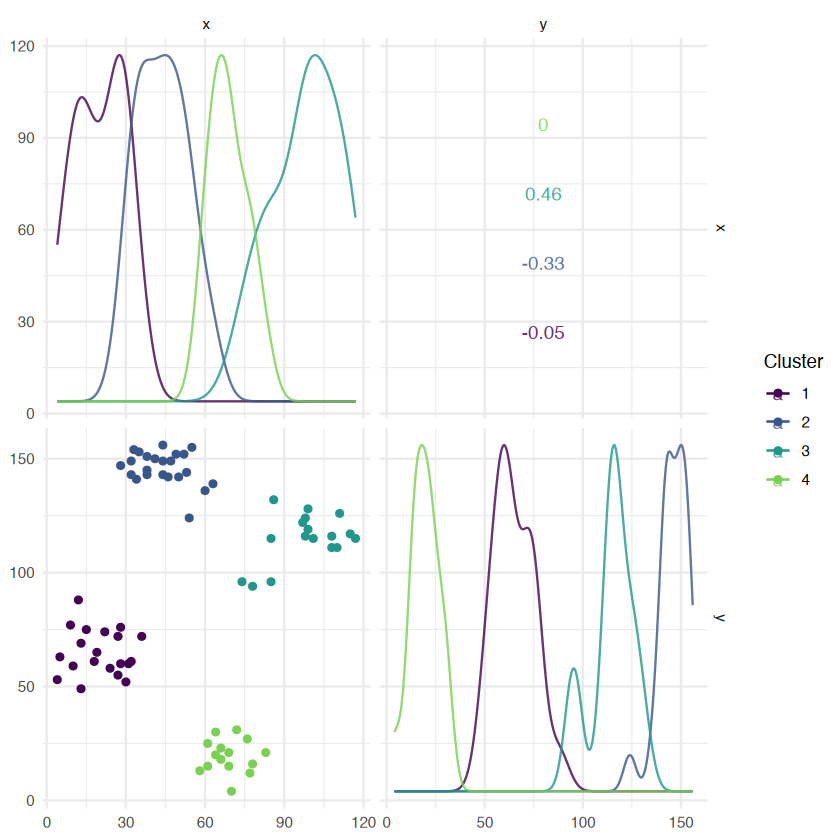

In [225]:
autoplot(pred_pam, task = tsk_ruspini, type = "scatter")

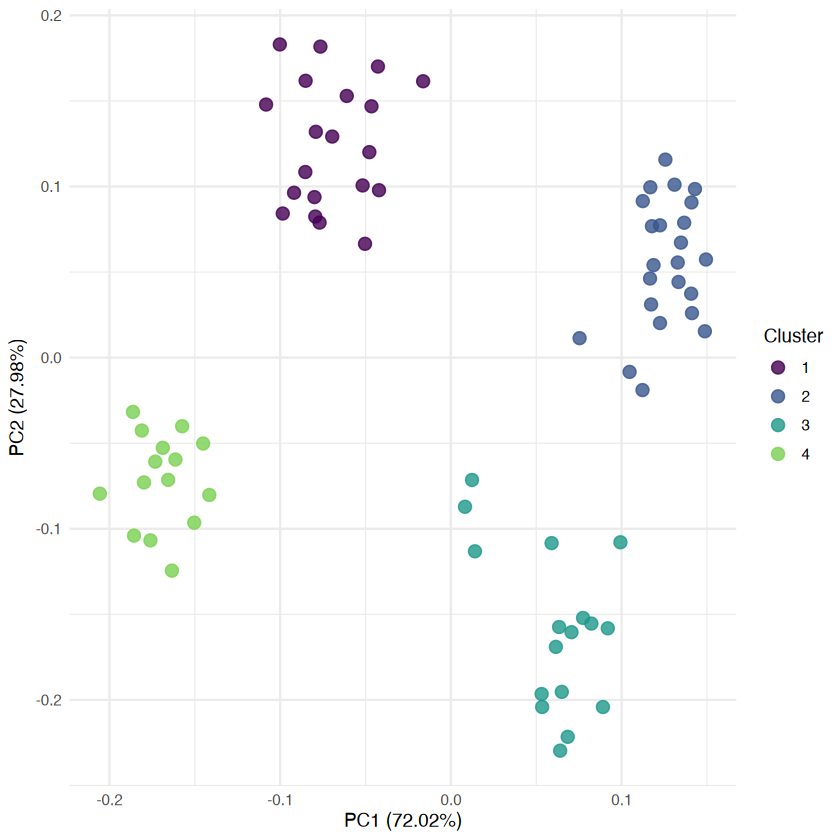

In [226]:
autoplot(pred_pam, task = tsk_ruspini, type = "pca")

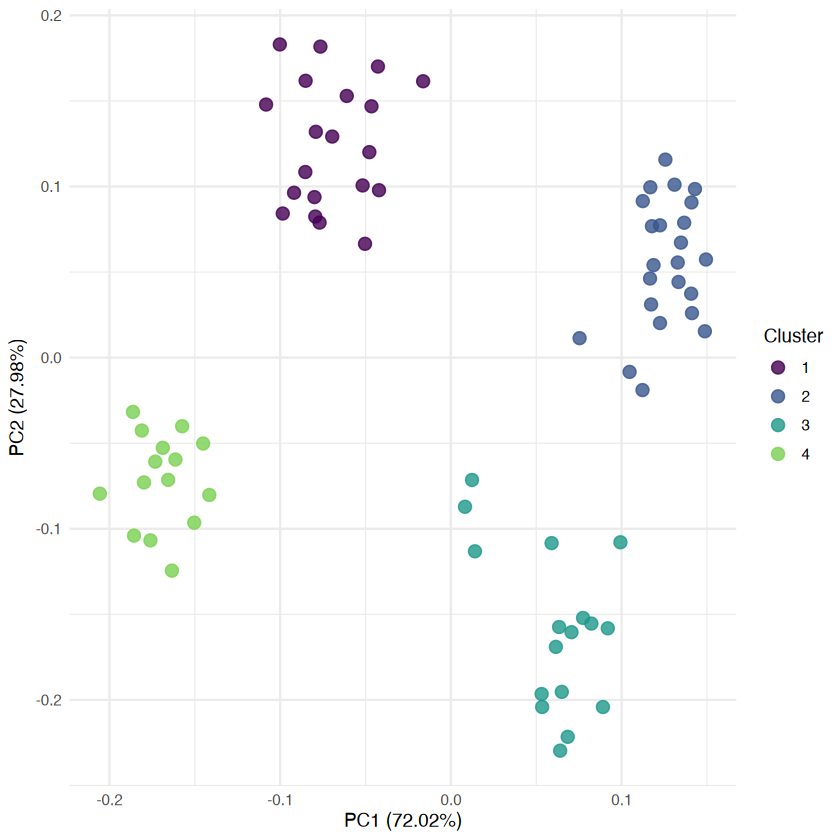

In [227]:
autoplot(pred_pam, task = tsk_ruspini, type = "pca")

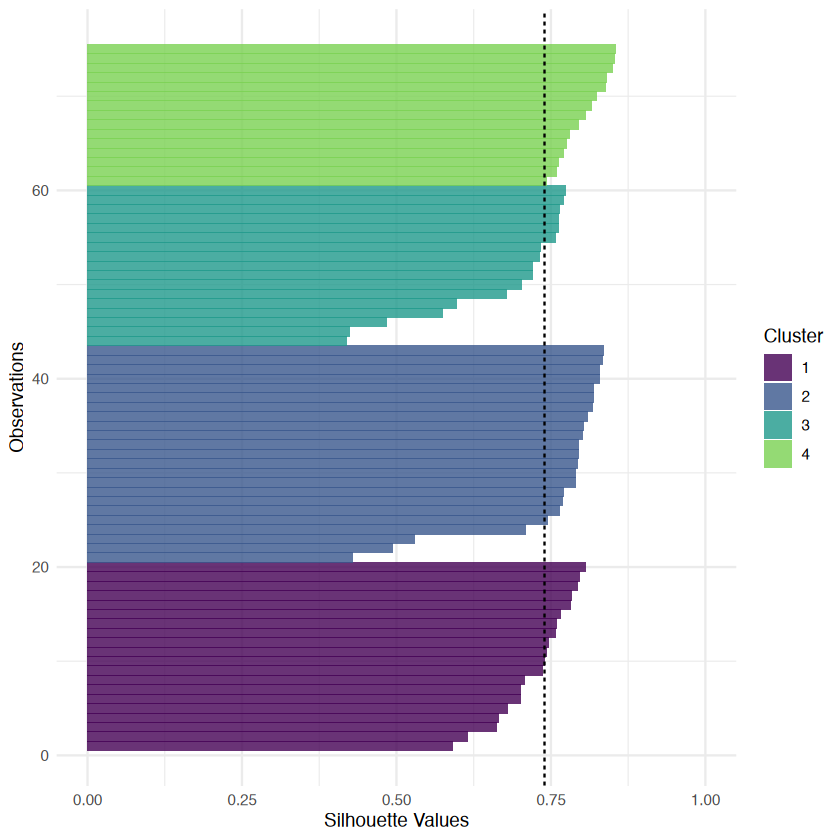

In [228]:
autoplot(pred_pam, task = tsk_ruspini, type = "sil")

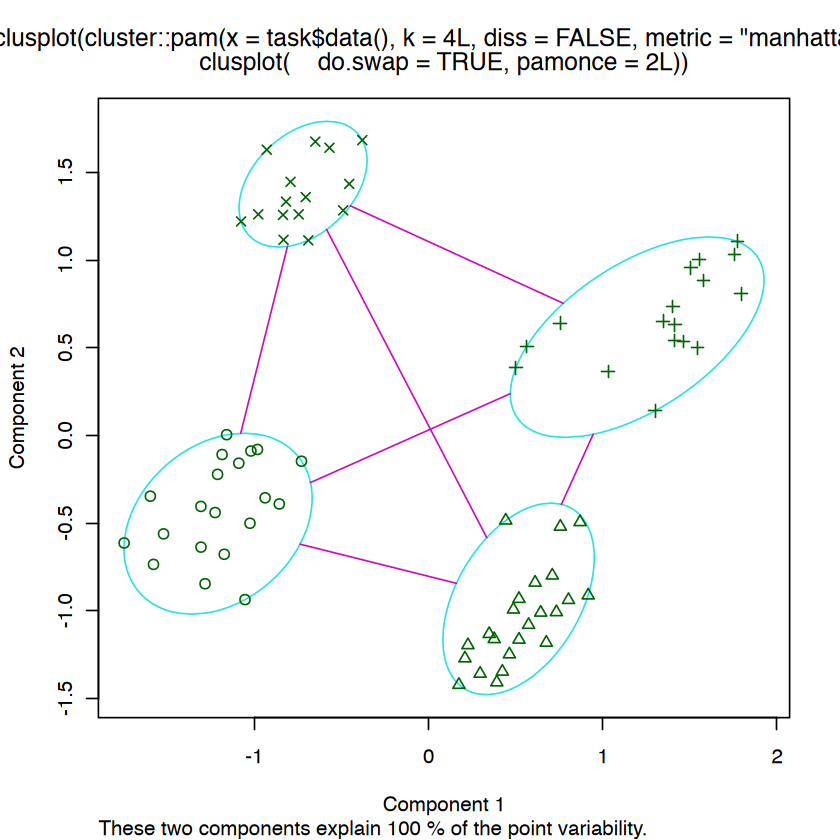

In [229]:
# 提取模型
model_pam <- lrn_pam$model$pam$model

# 绘图
clusplot(model_pam)

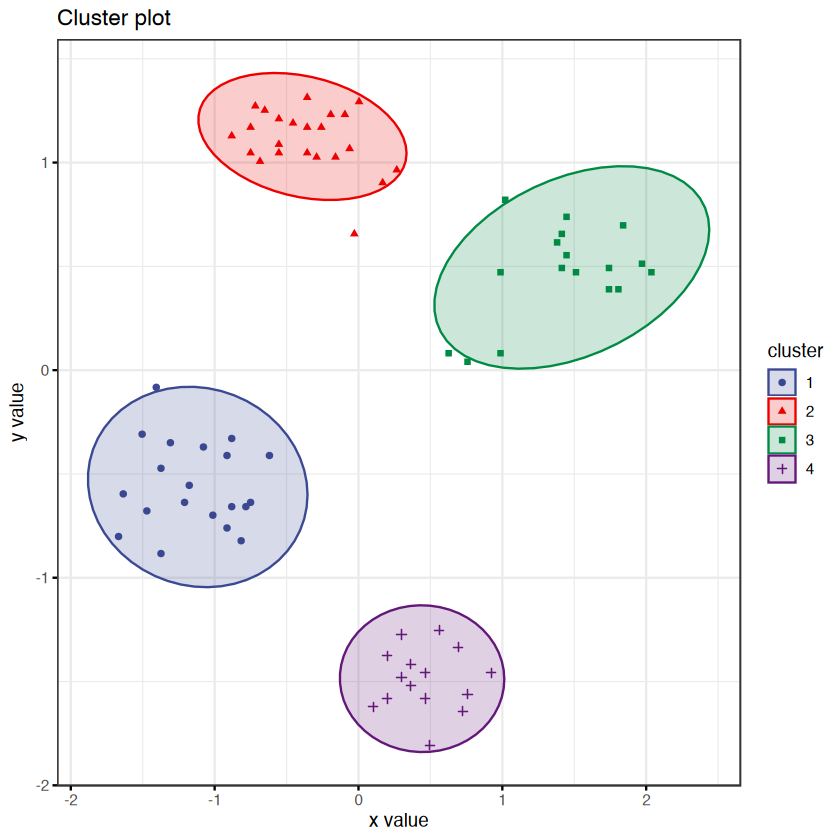

In [230]:
fviz_cluster(
  model_pam,
  ellipse = TRUE,           # 增加椭圆
  ellipse.type = "t",       # 椭圆类型
  geom = "point",           # 只显示点不要文字
  palette = "aaas",         # 支持超多配色方案
  ggtheme = theme_bw()      # 支持更换主题
)

In [ ]:
# 演示benchmark
# 定义任务
tsk_ruspini <- tsk("ruspini")

# 定义学习器
lrn_hclust <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("clust.hclust", id = "hclust")
)
lrn_hclust$id <- "hclust"
lrn_kmeans <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("clust.kmeans", id = "kmeans")
)
lrn_kmeans$id <- "kmeans"
lrn_pam <- as_learner(
  po("scale", scale = TRUE) %>>%
    lrn("clust.pam", id = "pam")
)
lrn_pam$id <- "pam"

# 定义学习器列表
learners <- list(lrn_hclust, lrn_kmeans, lrn_pam)

# 定义度量指标
msrs <- msr("clust.silhouette")

# 定义调优器
tnr_grid <- tnr("grid_search", resolution = 10L)

# 定义基准测试
design <- benchmark_grid(
  tasks = tsk_ruspini,
  learners = learners,
  resamplings = rsmp("insample")
)

# 执行基准测试
bmr <- benchmark(design)

# 查看结果
bmr$aggregate(msrs) %>%
  as.data.table() %>%
  select(learner_id, clust.silhouette) %>%
  arrange(desc(clust.silhouette))

# learner_id clust.silhouette
# 1 kmeans     0.5827264       
# 2 pam        0.5827264       
# 3 hclust     0.3642379

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustSil has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustSil.



INFO  [09:48:14.960] [mlr3] Running benchmark with 3 resampling iterations
INFO  [09:48:14.964] [mlr3] Applying learner 'hclust' on task 'ruspini' (iter 1/1)
INFO  [09:48:15.002] [mlr3] Applying learner 'kmeans' on task 'ruspini' (iter 1/1)
INFO  [09:48:15.040] [mlr3] Applying learner 'pam' on task 'ruspini' (iter 1/1)


Warning message in warn_prediction_useless(self$id):
"Learner 'hclust' doesn't predict on new data and predictions may not make sense on new data.
This happened PipeOp hclust's $predict()"


INFO  [09:48:15.088] [mlr3] Finished benchmark


learner_id,clust.silhouette
<chr>,<dbl>
kmeans,0.5827264
pam,0.5827264
hclust,0.3642379
